In [102]:
import pandas as pd
import numpy as np

In [103]:
import tiktoken
import openai

from openai.embeddings_utils import get_embedding

In [104]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

In [106]:
import re
import os

In [107]:
import json

In [108]:
openai.api_key = os.getenv("OPENAI_API_KEY")

# State-backed IO Tweets

## Russia East Africa (December 2021)

### EDA

In [109]:
directory_path = 'hashed_2021_12_REA_0621_REA_0621_tweets_csv_hashed'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
REA = pd.DataFrame()

# Loop through each CSV file and concatenate to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)
    REA = pd.concat([REA, df], ignore_index=True)

In [110]:
REA

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,333665076559093760,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,1,NaN,NaN,['425621529']
1,333664718755598337,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,1,['thebox'],NaN,['425621529']
2,333666499489312768,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,2,['theboxcomedy'],NaN,[]
3,333666885390434308,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,1,['theboxcomedy'],NaN,['87641049']
4,235295011409903616,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,0,NaN,NaN,['81101418']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,1371586305847488514,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,NaN,ma diversité de penser😉,NaN,3,16,2021-03-03,...,NaN,absent,absent,0,0,0,0,[],['https://lengosongo.cf/2021/03/14/le-vote-se-...,[]
7719,1366115083420581888,+CXVtzg2QuhCl8Eg67upC4vh+JBX5O4WGsUpdtWSU0=,+CXVtzg2QuhCl8Eg67upC4vh+JBX5O4WGsUpdtWSU0=,+CXVtzg2QuhCl8Eg67upC4vh+JBX5O4WGsUpdtWSU0=,Bangui-République Centrafrique,https://t.co/bIZZvB1GFV\nN°1 des médias Centra...,https://t.co/bIZZvB1GFV,5,36,2021-02-28,...,NaN,absent,absent,0,0,0,0,"['CAR', 'Electionse']",[],['2343277514']
7720,1368643401013428227,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,NaN,ma diversité de penser😉,NaN,3,16,2021-03-03,...,NaN,absent,absent,0,0,0,0,[],[],[]
7721,1371924132535877636,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,NaN,ma diversité de penser😉,NaN,3,16,2021-03-03,...,NaN,absent,absent,0,0,0,0,[],['https://ndjonisango.com/2021/03/16/rca-decry...,[]


In [111]:
REA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweetid                   7723 non-null   int64  
 1   userid                    7723 non-null   object 
 2   user_display_name         7723 non-null   object 
 3   user_screen_name          7723 non-null   object 
 4   user_reported_location    7626 non-null   object 
 5   user_profile_description  7614 non-null   object 
 6   user_profile_url          6096 non-null   object 
 7   follower_count            7723 non-null   int64  
 8   following_count           7723 non-null   int64  
 9   account_creation_date     7723 non-null   object 
 10  account_language          7723 non-null   object 
 11  tweet_language            7722 non-null   object 
 12  tweet_text                7723 non-null   object 
 13  tweet_time                7723 non-null   object 
 14  tweet_cl

In [725]:
class EDA:
    def __init__(self, data):
        self.data = data

    def plot_pie_chart(self, column, title, threshold=5.0):
        value_counts = self.data[column].value_counts()

        colors = plt.cm.Set2.colors

        fig, ax = plt.subplots(figsize=(8, 8))
        wedges, texts, autotexts = ax.pie(
            value_counts, labels=None,
            autopct=lambda p: f'{p:.1f}%' if p >= threshold else '',
            startangle=90, wedgeprops=dict(width=1), colors=colors
        )

        for autotext in autotexts:
            autotext.set_fontsize(8)

        ax.legend(value_counts.index, title=title, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

        ax.set_title(f'Percentage of {title}')
        plt.show()

    def plot_bar_chart(self, column, title, threshold=5.0):
        value_counts = self.data[column].value_counts()

        fig, ax = plt.subplots(figsize=(10, 6))
        bars = ax.bar(value_counts.index, value_counts)

        for bar in bars:
            height = bar.get_height()
            if height >= threshold:
                ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05,
                        f'{height}', ha='center', va='bottom', fontsize=8)

        ax.set_ylabel('Count')
        ax.set_title(f'{title} Counts')

        plt.xticks(rotation=45, ha='right')
        plt.show()

In [726]:
eda_rea = EDA(REA)

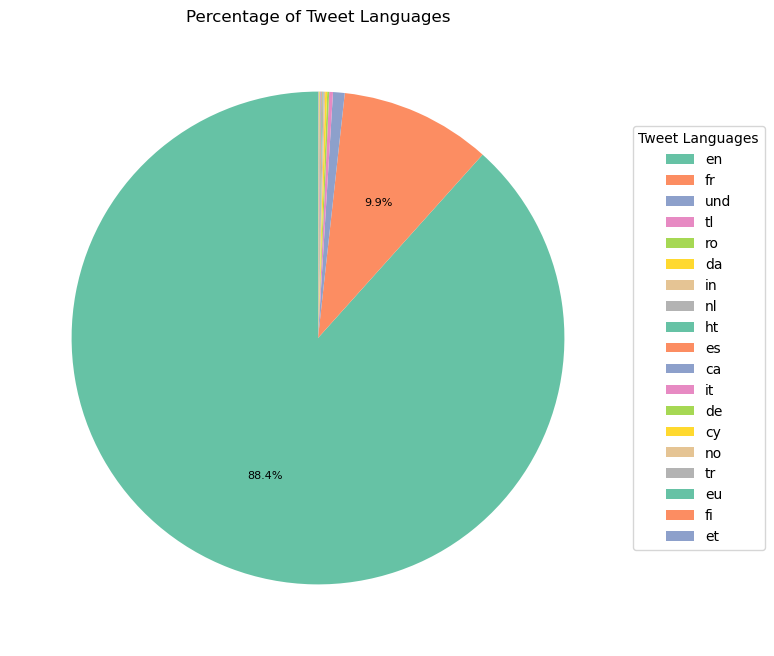

In [1457]:
eda_rea.plot_pie_chart(column='tweet_language', title='Tweet Languages')

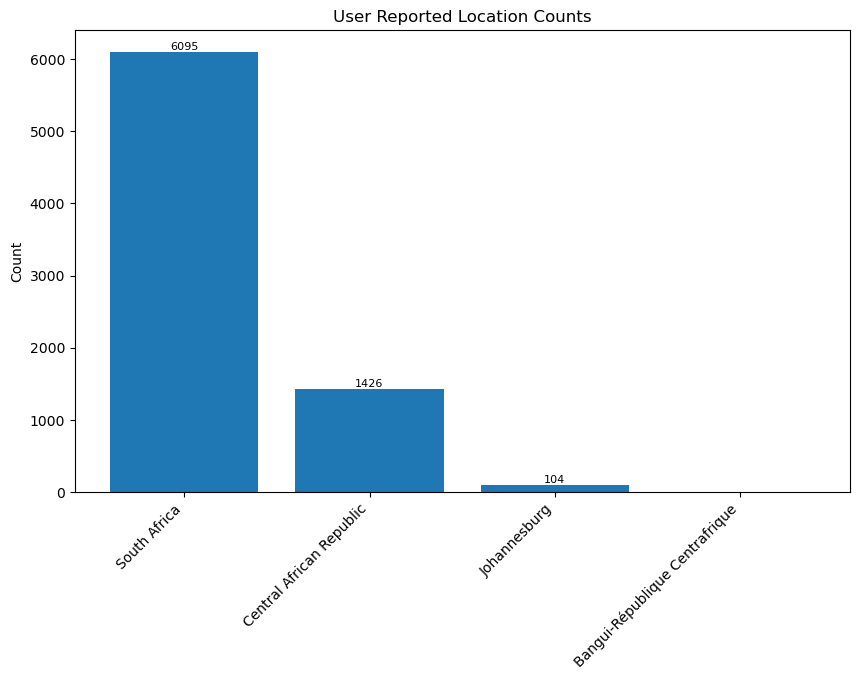

In [1458]:
eda_rea.plot_bar_chart(column='user_reported_location', title='User Reported Location')

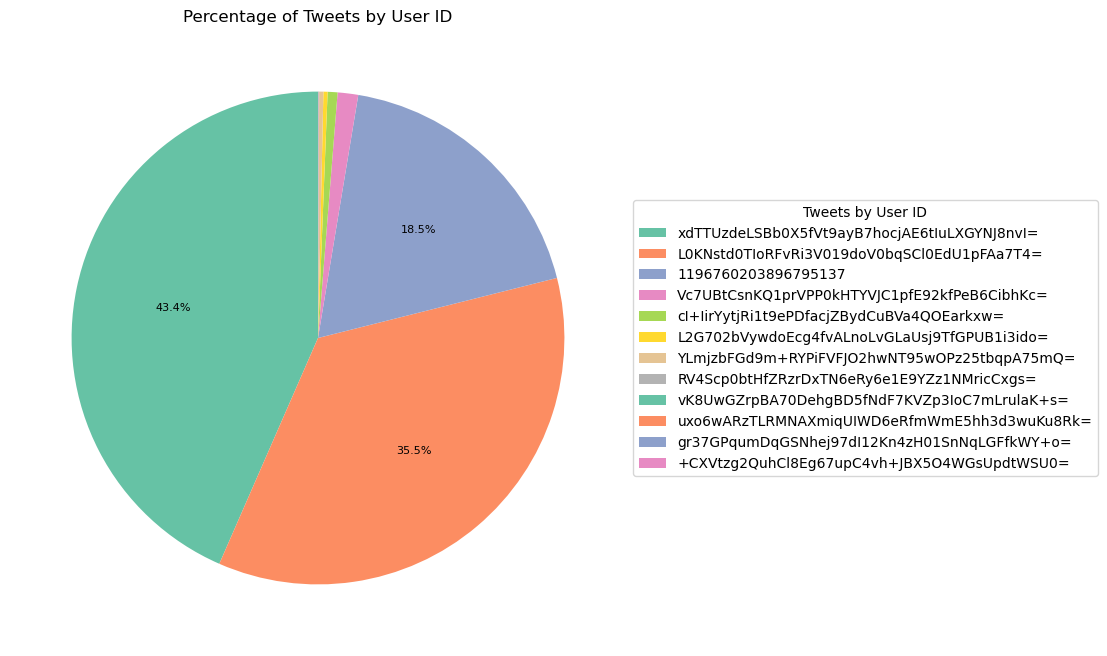

In [1459]:
eda_rea.plot_pie_chart(column='userid', title='Tweets by User ID')

### Embeddings

In [116]:
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

In [117]:
encoding = tiktoken.get_encoding(embedding_encoding)

In [734]:
def preprocess_dataframe(df, column_name, language_column=None, filter_language=None):
    # Drop rows where the specified column has NaN values
    df = df.dropna(subset=[column_name])

    # Drop duplicate rows based on the specified column
    df = df.drop_duplicates(subset=[column_name])

    # Apply a lambda function to remove single and double quotes from the specified column
    df[column_name] = df[column_name].apply(lambda x: str(x).replace("'", "").replace('"', ''))

    # Optionally filter by language
    if language_column and filter_language:
        df = df[df[language_column] == filter_language]

    return df

In [735]:
REA = preprocess_dataframe(REA,'tweet_text')

In [736]:
REA

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,333665076559093760,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,1,NaN,NaN,['425621529']
1,333664718755598337,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,1,['thebox'],NaN,['425621529']
2,333666499489312768,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,2,['theboxcomedy'],NaN,[]
3,333666885390434308,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,1,['theboxcomedy'],NaN,['87641049']
4,235295011409903616,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,0,NaN,NaN,['81101418']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,1371586305847488514,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,NaN,ma diversité de penser😉,NaN,3,16,2021-03-03,...,NaN,absent,absent,0,0,0,0,[],['https://lengosongo.cf/2021/03/14/le-vote-se-...,[]
7719,1366115083420581888,+CXVtzg2QuhCl8Eg67upC4vh+JBX5O4WGsUpdtWSU0=,+CXVtzg2QuhCl8Eg67upC4vh+JBX5O4WGsUpdtWSU0=,+CXVtzg2QuhCl8Eg67upC4vh+JBX5O4WGsUpdtWSU0=,Bangui-République Centrafrique,https://t.co/bIZZvB1GFV\nN°1 des médias Centra...,https://t.co/bIZZvB1GFV,5,36,2021-02-28,...,NaN,absent,absent,0,0,0,0,"['CAR', 'Electionse']",[],['2343277514']
7720,1368643401013428227,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,NaN,ma diversité de penser😉,NaN,3,16,2021-03-03,...,NaN,absent,absent,0,0,0,0,[],[],[]
7721,1371924132535877636,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,NaN,ma diversité de penser😉,NaN,3,16,2021-03-03,...,NaN,absent,absent,0,0,0,0,[],['https://ndjonisango.com/2021/03/16/rca-decry...,[]


In [737]:
REA_tweets = REA[['tweet_text']]

In [738]:
REA_tweets

,tweet_text
0,Lots and lots of laughter @ComedyCentralAF .lo...
1,@ComedyCentralAF great evening with comical s...
2,I love #theboxcomedy
3,@DonovanGoliath great performance!!!! We loved...
4,@andiskawahyu
...,...
7718,Le vote se déroule dans un environnement paisi...
7719,#CAR #Electionse. LArrivage à Bangui de 36 pal...
7720,Nous avançons vers la victoire. Tous ensemble ...
7721,Legislatives en RCA part II : Dans une intervi...


In [742]:
REA_tweets['embedding'] = REA_tweets.tweet_text.apply(lambda x: get_embedding(x, engine=embedding_model))

/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/775033624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  REA_tweets['embedding'] = REA_tweets.tweet_text.apply(lambda x: get_embedding(x, engine=embedding_model))


In [743]:
REA_tweets

,tweet_text,embedding
0,Lots and lots of laughter @ComedyCentralAF .lo...,"[-0.0007867192034609616, -0.01902170293033123,..."
1,@ComedyCentralAF great evening with comical s...,"[0.004576857667416334, -0.012598294764757156, ..."
2,I love #theboxcomedy,"[-0.02580142579972744, -0.02462626062333584, -..."
3,@DonovanGoliath great performance!!!! We loved...,"[-0.01739337667822838, -0.01568685658276081, 0..."
4,@andiskawahyu,"[-0.014608923345804214, 0.00451341038569808, -..."
...,...,...
7718,Le vote se déroule dans un environnement paisi...,"[-0.01786787621676922, -0.00781482458114624, 0..."
7719,#CAR #Electionse. LArrivage à Bangui de 36 pal...,"[-0.006032413803040981, 0.0006681901286356151,..."
7720,Nous avançons vers la victoire. Tous ensemble ...,"[-0.008708746172487736, 0.0043319775722920895,..."
7721,Legislatives en RCA part II : Dans une intervi...,"[-0.00033012160565704107, -0.00534502370283007..."


In [1143]:
class ClusteringAndThemeExtraction:
    def __init__(self, tweets_df, embedding_col, n_clusters=4, perplexity=30, tweet_per_cluster=5):
        self.tweets_df = tweets_df
        self.embedding_col = embedding_col
        self.n_clusters = n_clusters
        self.perplexity = perplexity
        self.tweet_per_cluster = tweet_per_cluster

    def perform_clustering(self):
        matrix_REA = np.vstack(self.tweets_df[self.embedding_col].values)

        kmeans = KMeans(n_clusters=self.n_clusters, init="k-means++", random_state=42)
        kmeans.fit(matrix_REA)
        labels = kmeans.labels_
        self.tweets_df["Cluster"] = labels

    def visualize_clusters(self):
        tsne = TSNE(n_components=2, perplexity=self.perplexity, random_state=42, init="random", learning_rate=200)
        vis_dims2 = tsne.fit_transform(np.vstack(self.tweets_df[self.embedding_col].values))

        x = [x for x, y in vis_dims2]
        y = [y for x, y in vis_dims2]

        for category, color in enumerate(["purple", "green", "red", "blue"]):
            xs = np.array(x)[self.tweets_df.Cluster == category]
            ys = np.array(y)[self.tweets_df.Cluster == category]
            plt.scatter(xs, ys, color=color, alpha=0.3)

            avg_x = xs.mean()
            avg_y = ys.mean()

            plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)

        plt.title("Clusters identified visualized in language 2D using t-SNE")
        plt.show()

    def extract_cluster_themes(self):
        for i in range(self.n_clusters):
            print(f"Cluster {i} Theme:", end=" ")

            tweets = "\n".join(
                self.tweets_df[self.tweets_df.Cluster == i]
                .tweet_text
                .sample(self.tweet_per_cluster, random_state=42)
                .values
            )

            response = openai.Completion.create(
                engine="text-davinci-003",
                prompt=f'What is the common narrative that the following tweets are trying to push?\n\nTweets:\n"""\n{tweets}\n"""\n\nTheme:',
                temperature=0,
                max_tokens=64,
                top_p=1,
                frequency_penalty=0,
                presence_penalty=0,
            )
            print(response["choices"][0]["text"].replace("\n", ""))

            sample_cluster_rows = self.tweets_df[self.tweets_df.Cluster == i].sample(self.tweet_per_cluster, random_state=42)
            for j in range(self.tweet_per_cluster):
                print(sample_cluster_rows.tweet_text.values[j], end=":   ")

            print("-" * 100)

In [745]:
clustering_rea = ClusteringAndThemeExtraction(REA_tweets, 'embedding')

In [746]:
clustering_rea.perform_clustering()

/Users/hailienguyen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/1764873631.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.tweets_df["Cluster"] = labels


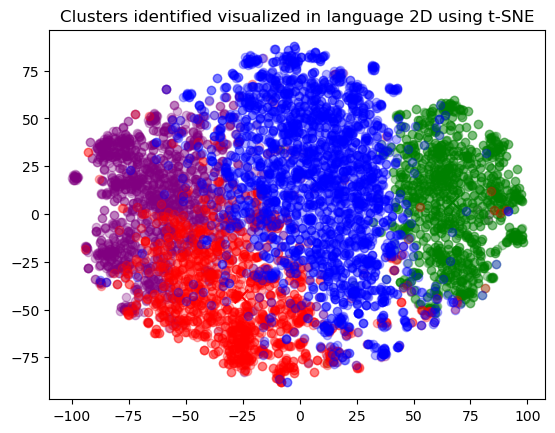

In [1144]:
clustering_rea.visualize_clusters()

In [1461]:
clustering_rea.extract_cluster_themes()

Cluster 0 Theme:  Crime and violence in South Africa
East London psychopath kidnapped 12-year-old boy and tortured him
https://t.co/opULuG6YxQ:   The assailants accosted and threatened a security guard outside the hospital in Durban at about 5am before entering the building. They walked into the hospital where they took two TV sets that were mounted on the wall and robbed patients of their cellphones and cash. https://t.co/916rSNgB9e:   Police have confiscated drugs to the value of R500,000
https://t.co/6wuOJASszE:   Police hunt gunmen who killed two officers in Durban - https://t.co/q0WMHNt2l0
Police in Durban are on a hunt for suspects who shot two Durban Metro Police officers on Monday in Inanda and fled the scene. The two officers were guarding the ANC’s councillor’s home in the Bhamb... https://t.co/5qgU7KcyYR:   Beware: Police warn #Limpopo residents against hitchhiking. It appears there is a syndicate that is operating in Limpopo targeting hitchhikers robbing them of their belon

In [762]:
REA_tweets.to_csv('REA_embeddings.csv', index=False)

# Random Twitter dataset (https://www.kaggle.com/datasets/i191796majid/tweets/)

In [1207]:
random1 = pd.read_csv('random_train.csv')

In [1208]:
random1

,index,sentiment,tweet
0,1083042,4,"@BLeigh1130 I got the Ricky survey finished, b..."
1,1400552,4,@raliii Welll when you have to again i'm sure ...
2,170002,0,Migraining today--the naproxen sodium tablets ...
3,1146244,4,@Kelliekclark1 me too...I hope he feels the sa...
4,1496286,4,Shrimp again it must be very good yamm. I was...
...,...,...,...
1439995,1213658,4,just noticed that one of my sites was featured...
1439996,403032,0,but I won't be getting any cause im going to ...
1439997,188678,0,"The family just left for airport. Darn, i cant..."
1439998,1244038,4,"@thisisbree Honestly, I noticed too. Just thou..."


In [1209]:
random1 = random1.drop(columns=['sentiment'])

In [1210]:
random2 = pd.read_csv('random_test.csv')

In [1211]:
random2

,index,tweet
0,723337,@ZoomIndianMedia all of it starts the same way...
1,1160574,Anyone up for 'UP' or night @ museum tonite? ...
2,1482094,@brrilynnnxd makes my day
3,964885,"Dance Show was so fun, amazingg I got to see ..."
4,703924,Voice from Iran: Shame on a country in which f...
...,...,...
160354,1600354,"After using LaTeX a lot, any other typeset mat..."
160355,1600355,"On that note, I hate Word. I hate Pages. I hat..."
160356,1600356,Ahhh... back in a *real* text editing environm...
160357,1600357,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [1212]:
random=pd.concat([random1, random2])

In [1213]:
random

,index,tweet
0,1083042,"@BLeigh1130 I got the Ricky survey finished, b..."
1,1400552,@raliii Welll when you have to again i'm sure ...
2,170002,Migraining today--the naproxen sodium tablets ...
3,1146244,@Kelliekclark1 me too...I hope he feels the sa...
4,1496286,Shrimp again it must be very good yamm. I was...
...,...,...
160354,1600354,"After using LaTeX a lot, any other typeset mat..."
160355,1600355,"On that note, I hate Word. I hate Pages. I hat..."
160356,1600356,Ahhh... back in a *real* text editing environm...
160357,1600357,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [1214]:
random = preprocess_dataframe(random,'tweet').drop(columns=['index'])

In [1215]:
random

,tweet
0,"@BLeigh1130 I got the Ricky survey finished, b..."
1,@raliii Welll when you have to again im sure y...
2,Migraining today--the naproxen sodium tablets ...
3,@Kelliekclark1 me too...I hope he feels the sa...
4,Shrimp again it must be very good yamm. I was...
...,...
160354,"After using LaTeX a lot, any other typeset mat..."
160355,"On that note, I hate Word. I hate Pages. I hat..."
160356,Ahhh... back in a *real* text editing environm...
160357,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [1216]:
random_sample = random.sample(3500)

In [1217]:
random_sample = random_sample.reset_index().drop('index',axis=1)

In [1218]:
random_sample

,tweet
0,Rainy days and thursdays always makes me down
1,im still on the computer.. its killing me slow...
2,@djknucklehead im guessing you wont ever be po...
3,@justine_hughes I brought that pool for my nep...
4,"Oh one thing, P.S: Follow me if you want ever..."
...,...
3495,@sophistifunk hahah fuck off man.
3496,i woke up angry!! lack of money really bringin...
3497,is serving the best beer in town: Leffe Ruby v...
3498,@odinhood: Thanks! Enjoy your wekend as well!


# Russian Diplomats (https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/2ET9PU&version=1.0)

In [784]:
dip_ru_path = 'diplos/ru/'

# Get a list of all JSONL files in the directory
jsonl_files = [file for file in os.listdir(dip_path) if file.endswith('.jsonl')]

In [785]:
jsonl_files

['RussiaJamaica.jsonl',
 'russiaun.jsonl',
 'embruscv.jsonl',
 'AmbRuMadagascar.jsonl',
 'Ru_Cons_Kolkata.jsonl',
 'amb_ulyanov.jsonl',
 'GKHurghada.jsonl',
 'rusconsulharbin.jsonl',
 'mid_penza.jsonl',
 'EmbRusPar.jsonl',
 'rusada.jsonl',
 'Russia.jsonl',
 'brics2020_rus.jsonl',
 'RusEmb_Ecuador.jsonl',
 'mission_russian.jsonl',
 'gkrfosaka.jsonl',
 'CamboRusEmba.jsonl',
 'RusEmbNam.jsonl',
 'emb_rus.jsonl',
 'EmbRusBoliviaRu.jsonl',
 'MID_Saransk.jsonl',
 'RusembZ.jsonl',
 'mid_travel.jsonl',
 'RusKonsLeipzig.jsonl',
 'RusEmbCro.jsonl',
 'Cis_Russia.jsonl',
 'KremlinRussia_E.jsonl',
 'RusEmb_Malaysia.jsonl',
 'mid_spb.jsonl',
 'RusEmbCyprus.jsonl',
 'EmbRusiaEnArgEs.jsonl',
 'Rus_Emb_Ireland.jsonl',
 'russia_ar.jsonl',
 'mvd_official.jsonl',
 'mid_vladivostok.jsonl',
 'midarkh.jsonl',
 'consularcamb.jsonl',
 'RusEmbSyria.jsonl',
 'MidIrkutsk.jsonl',
 'RusEmbTurkey.jsonl',
 'RusConsulGenHCM.jsonl',
 'MINZDRAV_RF.jsonl',
 'A__Alimov.jsonl',
 'EmbRusChile.jsonl',
 'gk_russia_haifa.jsonl

In [786]:
# Initialize an empty DataFrame to store the concatenated data
dip_ru = pd.DataFrame()

# Loop through each JSONL file and concatenate to the combined DataFrame
for jsonl_file in jsonl_files:
    file_path = os.path.join(dip_ru_path, jsonl_file)
    with open(file_path, 'r', encoding='utf-8') as file:
        # Assuming each line in the JSONL file is a valid JSON object
        data = [json.loads(line) for line in file]
    df = pd.DataFrame(data)
    dip_ru = pd.concat([dip_ru, df], ignore_index=True)

In [1219]:
dip_ru

,author_id,geo,possibly_sensitive,reply_settings,created_at,text,id,entities,context_annotations,lang,edit_controls,conversation_id,edit_history_tweet_ids,public_metrics,referenced_tweets,attachments,withheld,in_reply_to_user_id
0,249125650,{'place_id': 'd66ca907ceb62690'},False,everyone,2022-03-30T12:31:39.000Z,The truth about the #Mariupol refugees:\nhttps...,1509146334015729664,"{'annotations': [{'start': 21, 'end': 28, 'pro...","[{'domain': {'id': '123', 'name': 'Ongoing New...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1509146334015729664,[1509146334015729664],"{'retweet_count': 0, 'reply_count': 29, 'like_...",NaN,NaN,NaN,NaN
1,249125650,NaN,False,everyone,2022-03-25T15:02:33.000Z,RT @RussianEmbassy: Another @BBCNewsnight epis...,1507372370776010760,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","[{'domain': {'id': '3', 'name': 'TV Shows', 'd...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1507372370776010760,[1507372370776010760],"{'retweet_count': 115, 'reply_count': 0, 'like...","[{'type': 'retweeted', 'id': '1506974286174732...",NaN,NaN,NaN
2,249125650,{'place_id': 'd66ca907ceb62690'},False,everyone,2022-03-25T12:41:30.000Z,Ukraine’s Propaganda War: International PR Fir...,1507336872942518279,"{'annotations': [{'start': 0, 'end': 6, 'proba...","[{'domain': {'id': '88', 'name': 'Political Bo...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1507336872942518279,[1507336872942518279],"{'retweet_count': 3, 'reply_count': 22, 'like_...",NaN,NaN,NaN,NaN
3,249125650,{'place_id': 'd66ca907ceb62690'},False,everyone,2022-03-21T12:49:33.000Z,Maryana Naumovas response to Arnold Schwarzene...,1505889348163719176,"{'urls': [{'start': 53, 'end': 76, 'url': 'htt...","[{'domain': {'id': '131', 'name': 'Unified Twi...",pl,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1505889348163719176,[1505889348163719176],"{'retweet_count': 2, 'reply_count': 32, 'like_...",NaN,NaN,NaN,NaN
4,249125650,{'place_id': 'd66ca907ceb62690'},False,everyone,2022-03-19T14:44:56.000Z,#DebunkingFakes\n\nThe Neo-Nazis holed up in M...,1505193608856719360,"{'annotations': [{'start': 21, 'end': 29, 'pro...","[{'domain': {'id': '65', 'name': 'Interests an...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1505193608856719360,[1505193608856719360],"{'retweet_count': 3, 'reply_count': 41, 'like_...",NaN,{'media_keys': ['7_1505192422594252806']},NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66441,398068796,NaN,False,everyone,2022-02-10T03:47:25.000Z,"Since February 1, 2022, fully vaccinated Russi...",1491619791685107714,"{'urls': [{'start': 215, 'end': 238, 'url': 'h...","[{'domain': {'id': '123', 'name': 'Ongoing New...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1491619791685107714,[1491619791685107714],"{'retweet_count': 1, 'reply_count': 1, 'like_c...",NaN,NaN,NaN,NaN
66442,398068796,NaN,False,everyone,2022-02-03T05:10:38.000Z,О круглом столе по вопросам противодействия ко...,1489104014998265856,"{'urls': [{'start': 104, 'end': 127, 'url': 'h...",NaN,ru,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1489104014998265856,[1489104014998265856],"{'retweet_count': 15, 'reply_count': 3, 'like_...",NaN,"{'media_keys': ['3_1489103952322854912', '3_14...",NaN,NaN
66443,398068796,NaN,False,everyone,2022-01-25T06:44:53.000Z,Круглый стол «Стратегическая обстановка в зоне...,1485866244087730177,"{'urls': [{'start': 106, 'end': 129, 'url': 'h...",NaN,ru,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1485866244087730177,[1485866244087730177],"{'retweet_count': 0, 'reply_count': 2, 'like_c...",NaN,NaN,NaN,NaN
66444,398068796,NaN,False,everyone,2022-01-24T04:20:16.000Z,https://t.co/oB5X9T5cyP,1485467463324434432,"{'urls': [{'start': 0, 'end': 23, 'url': 'http...",NaN,zxx,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1485467463324434432,[1485467463324434432],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN,NaN,NaN


In [1220]:
dip_ru = preprocess_dataframe(dip_ru,'text')

In [1221]:
dip_ru

,author_id,geo,possibly_sensitive,reply_settings,created_at,text,id,entities,context_annotations,lang,edit_controls,conversation_id,edit_history_tweet_ids,public_metrics,referenced_tweets,attachments,withheld,in_reply_to_user_id
0,249125650,{'place_id': 'd66ca907ceb62690'},False,everyone,2022-03-30T12:31:39.000Z,The truth about the #Mariupol refugees:\nhttps...,1509146334015729664,"{'annotations': [{'start': 21, 'end': 28, 'pro...","[{'domain': {'id': '123', 'name': 'Ongoing New...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1509146334015729664,[1509146334015729664],"{'retweet_count': 0, 'reply_count': 29, 'like_...",NaN,NaN,NaN,NaN
1,249125650,NaN,False,everyone,2022-03-25T15:02:33.000Z,RT @RussianEmbassy: Another @BBCNewsnight epis...,1507372370776010760,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","[{'domain': {'id': '3', 'name': 'TV Shows', 'd...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1507372370776010760,[1507372370776010760],"{'retweet_count': 115, 'reply_count': 0, 'like...","[{'type': 'retweeted', 'id': '1506974286174732...",NaN,NaN,NaN
2,249125650,{'place_id': 'd66ca907ceb62690'},False,everyone,2022-03-25T12:41:30.000Z,Ukraine’s Propaganda War: International PR Fir...,1507336872942518279,"{'annotations': [{'start': 0, 'end': 6, 'proba...","[{'domain': {'id': '88', 'name': 'Political Bo...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1507336872942518279,[1507336872942518279],"{'retweet_count': 3, 'reply_count': 22, 'like_...",NaN,NaN,NaN,NaN
3,249125650,{'place_id': 'd66ca907ceb62690'},False,everyone,2022-03-21T12:49:33.000Z,Maryana Naumovas response to Arnold Schwarzene...,1505889348163719176,"{'urls': [{'start': 53, 'end': 76, 'url': 'htt...","[{'domain': {'id': '131', 'name': 'Unified Twi...",pl,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1505889348163719176,[1505889348163719176],"{'retweet_count': 2, 'reply_count': 32, 'like_...",NaN,NaN,NaN,NaN
4,249125650,{'place_id': 'd66ca907ceb62690'},False,everyone,2022-03-19T14:44:56.000Z,#DebunkingFakes\n\nThe Neo-Nazis holed up in M...,1505193608856719360,"{'annotations': [{'start': 21, 'end': 29, 'pro...","[{'domain': {'id': '65', 'name': 'Interests an...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1505193608856719360,[1505193608856719360],"{'retweet_count': 3, 'reply_count': 41, 'like_...",NaN,{'media_keys': ['7_1505192422594252806']},NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66441,398068796,NaN,False,everyone,2022-02-10T03:47:25.000Z,"Since February 1, 2022, fully vaccinated Russi...",1491619791685107714,"{'urls': [{'start': 215, 'end': 238, 'url': 'h...","[{'domain': {'id': '123', 'name': 'Ongoing New...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1491619791685107714,[1491619791685107714],"{'retweet_count': 1, 'reply_count': 1, 'like_c...",NaN,NaN,NaN,NaN
66442,398068796,NaN,False,everyone,2022-02-03T05:10:38.000Z,О круглом столе по вопросам противодействия ко...,1489104014998265856,"{'urls': [{'start': 104, 'end': 127, 'url': 'h...",NaN,ru,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1489104014998265856,[1489104014998265856],"{'retweet_count': 15, 'reply_count': 3, 'like_...",NaN,"{'media_keys': ['3_1489103952322854912', '3_14...",NaN,NaN
66443,398068796,NaN,False,everyone,2022-01-25T06:44:53.000Z,Круглый стол «Стратегическая обстановка в зоне...,1485866244087730177,"{'urls': [{'start': 106, 'end': 129, 'url': 'h...",NaN,ru,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1485866244087730177,[1485866244087730177],"{'retweet_count': 0, 'reply_count': 2, 'like_c...",NaN,NaN,NaN,NaN
66444,398068796,NaN,False,everyone,2022-01-24T04:20:16.000Z,https://t.co/oB5X9T5cyP,1485467463324434432,"{'urls': [{'start': 0, 'end': 23, 'url': 'http...",NaN,zxx,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1485467463324434432,[1485467463324434432],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN,NaN,NaN


In [1222]:
dip_ru_sample = dip_ru.sample(3500)

In [1223]:
dip_ru_sample

,author_id,geo,possibly_sensitive,reply_settings,created_at,text,id,entities,context_annotations,lang,edit_controls,conversation_id,edit_history_tweet_ids,public_metrics,referenced_tweets,attachments,withheld,in_reply_to_user_id
16773,255493944,NaN,False,everyone,2022-02-20T13:54:38.000Z,🇷🇺🇸🇾 О предстоящих переговорах С.В.Лаврова и М...,1495396479107747843,"{'urls': [{'start': 248, 'end': 271, 'url': 'h...",NaN,ru,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1495396479107747843,[1495396479107747843],"{'retweet_count': 19, 'reply_count': 8, 'like_...",NaN,{'media_keys': ['3_1495396473550348293']},NaN,NaN
62244,1316003300337123329,NaN,False,everyone,2022-03-04T11:56:17.000Z,RT @kpru: Санкции за фейки о действиях российс...,1499715350157479941,"{'mentions': [{'start': 3, 'end': 8, 'username...",NaN,ru,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1499715350157479941,[1499715350157479941],"{'retweet_count': 6, 'reply_count': 0, 'like_c...","[{'type': 'retweeted', 'id': '1499652151970308...",NaN,NaN,NaN
18545,2393592282,NaN,False,everyone,2022-02-27T03:30:57.000Z,☝️These acts of #censorship deprive the Austra...,1497776239989620739,"{'urls': [{'start': 172, 'end': 195, 'url': 'h...",NaN,en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1497776235669504000,[1497776239989620739],"{'retweet_count': 72, 'reply_count': 247, 'lik...","[{'type': 'replied_to', 'id': '149777623566950...",{'media_keys': ['3_1497775257641680896']},NaN,2393592282
26819,993290930,NaN,False,everyone,2022-02-14T11:13:09.000Z,"«50/50» Training (Budapest, July) Seminar for ...",1493181513961295876,"{'urls': [{'start': 190, 'end': 213, 'url': 'h...",NaN,en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1493181500879253507,[1493181513961295876],"{'retweet_count': 1, 'reply_count': 1, 'like_c...","[{'type': 'replied_to', 'id': '149318150087925...",{'media_keys': ['3_1493181504016592896']},NaN,993290930
32185,707067944,NaN,False,everyone,2022-03-05T13:40:49.000Z,RT @ZeeNews: भारत में रूस के राजदूत रोमन बाबुश...,1500104042659577856,"{'hashtags': [{'start': 107, 'end': 122, 'tag'...","[{'domain': {'id': '47', 'name': 'Brand', 'des...",hi,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1500104042659577856,[1500104042659577856],"{'retweet_count': 33, 'reply_count': 0, 'like_...","[{'type': 'retweeted', 'id': '1500027417020477...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59886,963722112,NaN,False,everyone,2022-03-22T18:07:00.000Z,RT @mod_russia: #ГероиZ https://t.co/3sundzdmT3,1506331626573340677,"{'urls': [{'start': 24, 'end': 47, 'url': 'htt...",NaN,qme,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1506331626573340677,[1506331626573340677],"{'retweet_count': 155, 'reply_count': 0, 'like...","[{'type': 'retweeted', 'id': '1506113437121847...",{'media_keys': ['13_1505998089349476352']},NaN,NaN
28905,3256927757,NaN,False,everyone,2022-02-02T20:38:38.000Z,"RT @sputnikvaccine: Alexander Gintsburg, Gamal...",1488975167518920704,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","[{'domain': {'id': '123', 'name': 'Ongoing New...",en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1488975167518920704,[1488975167518920704],"{'retweet_count': 98, 'reply_count': 0, 'like_...","[{'type': 'retweeted', 'id': '1488799405180338...",NaN,NaN,NaN
54983,2154112404,NaN,False,everyone,2022-03-13T22:16:59.000Z,RT @EmbSergio: Hoy hablamos con @VillegasPolja...,1503133046144446480,"{'mentions': [{'start': 3, 'end': 13, 'usernam...",NaN,es,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1503133046144446480,[1503133046144446480],"{'retweet_count': 187, 'reply_count': 0, 'like...","[{'type': 'retweeted', 'id': '1503114024082460...",NaN,NaN,NaN
44629,1412445084553936897,NaN,False,everyone,2022-03-11T04:18:04.000Z,Covers of Western magazines they are not asham...,1502136750398853122,"{'urls': [{'start': 62, 'end': 85, 'url': 'htt...",NaN,en,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1502136750398853122,[1

In [1224]:
dip_ru_sample = dip_ru_sample[['text']]

In [1225]:
dip_ru_sample = dip_ru_sample.reset_index().drop('index',axis=1)

In [1226]:
dip_ru_sample = dip_ru_sample.rename(columns={'text': 'tweet'})

In [1227]:
dip_ru_sample

,tweet
0,🇷🇺🇸🇾 О предстоящих переговорах С.В.Лаврова и М...
1,RT @kpru: Санкции за фейки о действиях российс...
2,☝️These acts of #censorship deprive the Austra...
3,"«50/50» Training (Budapest, July) Seminar for ..."
4,RT @ZeeNews: भारत में रूस के राजदूत रोमन बाबुश...
...,...
3495,RT @mod_russia: #ГероиZ https://t.co/3sundzdmT3
3496,"RT @sputnikvaccine: Alexander Gintsburg, Gamal..."
3497,RT @EmbSergio: Hoy hablamos con @VillegasPolja...
3498,Covers of Western magazines they are not asham...


# REA preprocessing - split train-test by user ID

In [1228]:
rea = REA

In [1229]:
rea

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,333665076559093760,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,1,NaN,NaN,['425621529']
1,333664718755598337,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,1,['thebox'],NaN,['425621529']
2,333666499489312768,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,2,['theboxcomedy'],NaN,[]
3,333666885390434308,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,1,['theboxcomedy'],NaN,['87641049']
4,235295011409903616,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Vc7UBtCsnKQ1prVPP0kHTYVJC1pfE92kfPeB6CibhKc=,Johannesburg,NaN,NaN,142,630,2012-04-12,...,NaN,absent,absent,0,0,0,0,NaN,NaN,['81101418']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,1371586305847488514,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,NaN,ma diversité de penser😉,NaN,3,16,2021-03-03,...,NaN,absent,absent,0,0,0,0,[],['https://lengosongo.cf/2021/03/14/le-vote-se-...,[]
7719,1366115083420581888,+CXVtzg2QuhCl8Eg67upC4vh+JBX5O4WGsUpdtWSU0=,+CXVtzg2QuhCl8Eg67upC4vh+JBX5O4WGsUpdtWSU0=,+CXVtzg2QuhCl8Eg67upC4vh+JBX5O4WGsUpdtWSU0=,Bangui-République Centrafrique,https://t.co/bIZZvB1GFV\nN°1 des médias Centra...,https://t.co/bIZZvB1GFV,5,36,2021-02-28,...,NaN,absent,absent,0,0,0,0,"['CAR', 'Electionse']",[],['2343277514']
7720,1368643401013428227,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,NaN,ma diversité de penser😉,NaN,3,16,2021-03-03,...,NaN,absent,absent,0,0,0,0,[],[],[]
7721,1371924132535877636,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,YLmjzbFGd9m+RYPiFVFJO2hwNT95wOPz25tbqpA75mQ=,NaN,ma diversité de penser😉,NaN,3,16,2021-03-03,...,NaN,absent,absent,0,0,0,0,[],['https://ndjonisango.com/2021/03/16/rca-decry...,[]


In [1230]:
# Assuming 'user_id' is the column with user IDs and 'tweet_text' is the column with tweet text
user_tweet_counts = rea.groupby('userid')['tweet_text'].count()

# Sort users based on tweet counts
sorted_users = user_tweet_counts.sort_values(ascending=False)

# Calculate the total tweet counts
total_tweet_counts = sorted_users.sum()

threshold = 0.7 * total_tweet_counts

# Initialize variables
current_tweet_count = 0
train_user_ids = []

# Iterate through sorted users until reaching the threshold
for user_id, tweet_count in sorted_users.items():
    current_tweet_count += tweet_count
    train_user_ids.append(user_id)
    if current_tweet_count >= threshold:
        break

# Create the training set
train_set = rea[rea['userid'].isin(train_user_ids)]
valid_set = rea[~rea['userid'].isin(train_user_ids)]

# Verify the proportions in training and valid sets
print(f'Training set proportion: {len(train_set)/(len(train_set)+len(valid_set))}')
print(f'Valid set proportion: {len(valid_set)/(len(train_set)+len(valid_set))}')

Training set proportion: 0.789146483616112
Valid set proportion: 0.2108535163838881


# Fine-tuning

In [1231]:
nonio_sample = pd.concat([dip_ru_sample, random_sample]).reset_index().drop('index', axis=1)

In [1232]:
nonio_sample

,tweet
0,🇷🇺🇸🇾 О предстоящих переговорах С.В.Лаврова и М...
1,RT @kpru: Санкции за фейки о действиях российс...
2,☝️These acts of #censorship deprive the Austra...
3,"«50/50» Training (Budapest, July) Seminar for ..."
4,RT @ZeeNews: भारत में रूस के राजदूत रोमन बाबुश...
...,...
6995,@sophistifunk hahah fuck off man.
6996,i woke up angry!! lack of money really bringin...
6997,is serving the best beer in town: Leffe Ruby v...
6998,@odinhood: Thanks! Enjoy your wekend as well!


In [1233]:
nonio_sample = nonio_sample.rename(columns={'tweet': 'prompt'})

In [1234]:
nonio_sample

,prompt
0,🇷🇺🇸🇾 О предстоящих переговорах С.В.Лаврова и М...
1,RT @kpru: Санкции за фейки о действиях российс...
2,☝️These acts of #censorship deprive the Austra...
3,"«50/50» Training (Budapest, July) Seminar for ..."
4,RT @ZeeNews: भारत में रूस के राजदूत रोमन बाबुश...
...,...
6995,@sophistifunk hahah fuck off man.
6996,i woke up angry!! lack of money really bringin...
6997,is serving the best beer in town: Leffe Ruby v...
6998,@odinhood: Thanks! Enjoy your wekend as well!


In [1235]:
io_sample = rea[['tweet_text']]

In [1236]:
io_sample

,tweet_text
0,Lots and lots of laughter @ComedyCentralAF .lo...
1,@ComedyCentralAF great evening with comical s...
2,I love #theboxcomedy
3,@DonovanGoliath great performance!!!! We loved...
4,@andiskawahyu
...,...
7718,Le vote se déroule dans un environnement paisi...
7719,#CAR #Electionse. LArrivage à Bangui de 36 pal...
7720,Nous avançons vers la victoire. Tous ensemble ...
7721,Legislatives en RCA part II : Dans une intervi...


In [1237]:
io_sample = io_sample.rename(columns={'tweet_text': 'prompt'})

In [1238]:
io_sample

,prompt
0,Lots and lots of laughter @ComedyCentralAF .lo...
1,@ComedyCentralAF great evening with comical s...
2,I love #theboxcomedy
3,@DonovanGoliath great performance!!!! We loved...
4,@andiskawahyu
...,...
7718,Le vote se déroule dans un environnement paisi...
7719,#CAR #Electionse. LArrivage à Bangui de 36 pal...
7720,Nous avançons vers la victoire. Tous ensemble ...
7721,Legislatives en RCA part II : Dans une intervi...


In [1240]:
io_sample['completion'] = ' belongs to a state-backed information operation'

In [1241]:
io_sample

,prompt,completion
0,Lots and lots of laughter @ComedyCentralAF .lo...,belongs to a state-backed information operation
1,@ComedyCentralAF great evening with comical s...,belongs to a state-backed information operation
2,I love #theboxcomedy,belongs to a state-backed information operation
3,@DonovanGoliath great performance!!!! We loved...,belongs to a state-backed information operation
4,@andiskawahyu,belongs to a state-backed information operation
...,...,...
7718,Le vote se déroule dans un environnement paisi...,belongs to a state-backed information operation
7719,#CAR #Electionse. LArrivage à Bangui de 36 pal...,belongs to a state-backed information operation
7720,Nous avançons vers la victoire. Tous ensemble ...,belongs to a state-backed information operation
7721,Legislatives en RCA part II : Dans une intervi...,belongs to a state-backed information operation


In [1242]:
nonio_sample['completion'] = ' does not belong to a state-backed information operation'

In [1243]:
nonio_sample

,prompt,completion
0,🇷🇺🇸🇾 О предстоящих переговорах С.В.Лаврова и М...,does not belong to a state-backed information...
1,RT @kpru: Санкции за фейки о действиях российс...,does not belong to a state-backed information...
2,☝️These acts of #censorship deprive the Austra...,does not belong to a state-backed information...
3,"«50/50» Training (Budapest, July) Seminar for ...",does not belong to a state-backed information...
4,RT @ZeeNews: भारत में रूस के राजदूत रोमन बाबुश...,does not belong to a state-backed information...
...,...,...
6995,@sophistifunk hahah fuck off man.,does not belong to a state-backed information...
6996,i woke up angry!! lack of money really bringin...,does not belong to a state-backed information...
6997,is serving the best beer in town: Leffe Ruby v...,does not belong to a state-backed information...
6998,@odinhood: Thanks! Enjoy your wekend as well!,does not belong to a state-backed information...


In [1244]:
sample = pd.concat([nonio_sample, io_sample])

In [1245]:
sample

,prompt,completion
0,🇷🇺🇸🇾 О предстоящих переговорах С.В.Лаврова и М...,does not belong to a state-backed information...
1,RT @kpru: Санкции за фейки о действиях российс...,does not belong to a state-backed information...
2,☝️These acts of #censorship deprive the Austra...,does not belong to a state-backed information...
3,"«50/50» Training (Budapest, July) Seminar for ...",does not belong to a state-backed information...
4,RT @ZeeNews: भारत में रूस के राजदूत रोमन बाबुश...,does not belong to a state-backed information...
...,...,...
7718,Le vote se déroule dans un environnement paisi...,belongs to a state-backed information operation
7719,#CAR #Electionse. LArrivage à Bangui de 36 pal...,belongs to a state-backed information operation
7720,Nous avançons vers la victoire. Tous ensemble ...,belongs to a state-backed information operation
7721,Legislatives en RCA part II : Dans une intervi...,belongs to a state-backed information operation


In [1246]:
sample.to_json("sample.jsonl", orient='records', lines=True)

In [1247]:
!openai tools fine_tunes.prepare_data -f sample.jsonl -q

Analyzing...

- Your file contains 14721 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- Your data does not contain a common separator at the end of your prompts. Having a separator string appended to the end of the prompt makes it clearer to the fine-tuned model where the completion should begin. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more detail and examples. If you intend to do open-ended generation, then you should leave the prompts empty

Based on the analysis we will perform the following actions:
- [Recommended] Add a suffix separator `\n\n###\n\n` to all prompts [Y/n]: Y
- [Recommended] Would you like to split into training and validation set? [Y

In [1248]:
io_sample

,prompt,completion
0,Lots and lots of laughter @ComedyCentralAF .lo...,belongs to a state-backed information operation
1,@ComedyCentralAF great evening with comical s...,belongs to a state-backed information operation
2,I love #theboxcomedy,belongs to a state-backed information operation
3,@DonovanGoliath great performance!!!! We loved...,belongs to a state-backed information operation
4,@andiskawahyu,belongs to a state-backed information operation
...,...,...
7718,Le vote se déroule dans un environnement paisi...,belongs to a state-backed information operation
7719,#CAR #Electionse. LArrivage à Bangui de 36 pal...,belongs to a state-backed information operation
7720,Nous avançons vers la victoire. Tous ensemble ...,belongs to a state-backed information operation
7721,Legislatives en RCA part II : Dans une intervi...,belongs to a state-backed information operation


In [1249]:
nonio_sample

,prompt,completion
0,🇷🇺🇸🇾 О предстоящих переговорах С.В.Лаврова и М...,does not belong to a state-backed information...
1,RT @kpru: Санкции за фейки о действиях российс...,does not belong to a state-backed information...
2,☝️These acts of #censorship deprive the Austra...,does not belong to a state-backed information...
3,"«50/50» Training (Budapest, July) Seminar for ...",does not belong to a state-backed information...
4,RT @ZeeNews: भारत में रूस के राजदूत रोमन बाबुश...,does not belong to a state-backed information...
...,...,...
6995,@sophistifunk hahah fuck off man.,does not belong to a state-backed information...
6996,i woke up angry!! lack of money really bringin...,does not belong to a state-backed information...
6997,is serving the best beer in town: Leffe Ruby v...,does not belong to a state-backed information...
6998,@odinhood: Thanks! Enjoy your wekend as well!,does not belong to a state-backed information...


In [1252]:
train_io = train_set[['tweet_text']]

In [1253]:
valid_io = valid_set[['tweet_text']]

In [1254]:
train_io['completion'] = ' belongs to a state-backed information operation'

/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/2974149374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_io['completion'] = ' belongs to a state-backed information operation'


In [1255]:
train_io

,tweet_text,completion
23,"@NteyiZuki Failed robbery at Bridge City, KZN.",belongs to a state-backed information operation
26,@GovernmentZA employees will be marching to th...,belongs to a state-backed information operation
27,The prisoner did not even manage to approach t...,belongs to a state-backed information operation
28,Police then spotted a suspicious looking male ...,belongs to a state-backed information operation
29,"On May 28, 2018, Mkhize together with his acco...",belongs to a state-backed information operation
...,...,...
7664,Justice Balogun of the Ogun State High Court h...,belongs to a state-backed information operation
7665,Zimbabwe: Catholic Bishops ‘promoting genocide...,belongs to a state-backed information operation
7666,#Botswana: This is one of the biggest disaster...,belongs to a state-backed information operation
7677,Unidentified illness found in West African cou...,belongs to a state-backed information operation


In [1256]:
train_io = train_io.rename(columns={'tweet_text': 'prompt'})

In [1257]:
valid_io['completion'] = ' belongs to a state-backed information operation'

/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/438077141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_io['completion'] = ' belongs to a state-backed information operation'


In [1258]:
valid_io

,tweet_text,completion
0,Lots and lots of laughter @ComedyCentralAF .lo...,belongs to a state-backed information operation
1,@ComedyCentralAF great evening with comical s...,belongs to a state-backed information operation
2,I love #theboxcomedy,belongs to a state-backed information operation
3,@DonovanGoliath great performance!!!! We loved...,belongs to a state-backed information operation
4,@andiskawahyu,belongs to a state-backed information operation
...,...,...
7718,Le vote se déroule dans un environnement paisi...,belongs to a state-backed information operation
7719,#CAR #Electionse. LArrivage à Bangui de 36 pal...,belongs to a state-backed information operation
7720,Nous avançons vers la victoire. Tous ensemble ...,belongs to a state-backed information operation
7721,Legislatives en RCA part II : Dans une intervi...,belongs to a state-backed information operation


In [1259]:
valid_io = valid_io.rename(columns={'tweet_text': 'prompt'})

In [1260]:
valid_io

,prompt,completion
0,Lots and lots of laughter @ComedyCentralAF .lo...,belongs to a state-backed information operation
1,@ComedyCentralAF great evening with comical s...,belongs to a state-backed information operation
2,I love #theboxcomedy,belongs to a state-backed information operation
3,@DonovanGoliath great performance!!!! We loved...,belongs to a state-backed information operation
4,@andiskawahyu,belongs to a state-backed information operation
...,...,...
7718,Le vote se déroule dans un environnement paisi...,belongs to a state-backed information operation
7719,#CAR #Electionse. LArrivage à Bangui de 36 pal...,belongs to a state-backed information operation
7720,Nous avançons vers la victoire. Tous ensemble ...,belongs to a state-backed information operation
7721,Legislatives en RCA part II : Dans une intervi...,belongs to a state-backed information operation


In [1261]:
# Create a random permutation of the DataFrame indices
permuted_indices = np.random.permutation(nonio_sample.index)

# Calculate the index for the split point (80% training, 20% valid)
split_index = int(0.78 * len(permuted_indices))

# Split the DataFrame into training and test sets
train_nonio = nonio_sample.loc[permuted_indices[:split_index]]
valid_nonio = nonio_sample.loc[permuted_indices[split_index:]]

In [1262]:
train_nonio

,prompt,completion
1541,The information was provided by a surrendered ...,does not belong to a state-backed information...
2092,RT @vzglyad: Фильмы «Брат» и «Брат 2» решили п...,does not belong to a state-backed information...
3358,"RT @interfax_news: Силуанов счел, что западные...",does not belong to a state-backed information...
1004,Жизнь начинается с порядка в твоей голове. #Бе...,does not belong to a state-backed information...
3787,@maccast Cant seem to duplicate it,does not belong to a state-backed information...
...,...,...
4730,@frugalgirl Blogger is being mean tonight Try...,does not belong to a state-backed information...
1442,RT @mae_rusia: 💬 Presidente Vladímir #Putin: E...,does not belong to a state-backed information...
2904,The international project Eternal Dostoevsky w...,does not belong to a state-backed information...
1384,⚡️ Maryana Naumovas response to @Schwarzenegge...,does not belong to a state-backed information...


In [1263]:
valid_nonio

,prompt,completion
4205,"I am uncontrollably dizzy today, it just wont ...",does not belong to a state-backed information...
1279,💬 S.V.#Lavrov in an interview with Russian rad...,does not belong to a state-backed information...
1817,🇷🇺🇵🇦 El 3 de marzo en la sede del Partido Revo...,does not belong to a state-backed information...
2924,❗ Nous demandons la libération immédiate de la...,does not belong to a state-backed information...
5481,i cant find any1 who wants to/is available to ...,does not belong to a state-backed information...
...,...,...
191,O faktorech úspěchu při studiu ruštiny jako ci...,does not belong to a state-backed information...
4690,@whatshisface babyyyyyy everything is going t...,does not belong to a state-backed information...
1043,RT @mission_rf: 🎵Дорогие друзья и коллеги! В э...,does not belong to a state-backed information...
5897,"@gerardway hey guys, whats the chances of you ...",does not belong to a state-backed information...


In [1264]:
train = pd.concat([train_io,train_nonio]).sample(frac=1, random_state=42).reset_index().drop('index',axis=1)

In [1265]:
train

,prompt,completion
0,The court in Joburg will decide today whether ...,belongs to a state-backed information operation
1,🇷🇺💬#Russian Deputy Foreign Minister Alexander ...,does not belong to a state-backed information...
2,All Hearts Foundation South Africa founder cur...,belongs to a state-backed information operation
3,Little girl dies in two-vehicle collision in P...,belongs to a state-backed information operation
4,Maybe 2021 indeed changed public perception of...,does not belong to a state-backed information...
...,...,...
11548,agh. sore throats suck. i love gay people - ...,does not belong to a state-backed information...
11549,How much do South African Members of Parliamen...,belongs to a state-backed information operation
11550,SA Government to recoup money stolen through s...,belongs to a state-backed information operation
11551,Its been 7 years since 34 miners were shot dur...,belongs to a state-backed information operation


In [1266]:
train['prompt'] = train['prompt'].apply(lambda x: str(x) + '\n\n###\n\n')

In [1267]:
train

,prompt,completion
0,The court in Joburg will decide today whether ...,belongs to a state-backed information operation
1,🇷🇺💬#Russian Deputy Foreign Minister Alexander ...,does not belong to a state-backed information...
2,All Hearts Foundation South Africa founder cur...,belongs to a state-backed information operation
3,Little girl dies in two-vehicle collision in P...,belongs to a state-backed information operation
4,Maybe 2021 indeed changed public perception of...,does not belong to a state-backed information...
...,...,...
11548,agh. sore throats suck. i love gay people - ...,does not belong to a state-backed information...
11549,How much do South African Members of Parliamen...,belongs to a state-backed information operation
11550,SA Government to recoup money stolen through s...,belongs to a state-backed information operation
11551,Its been 7 years since 34 miners were shot dur...,belongs to a state-backed information operation


In [1268]:
valid = pd.concat([valid_io,valid_nonio]).sample(frac=1, random_state=42).reset_index().drop('index',axis=1)

In [1269]:
valid

,prompt,completion
0,Good mood! Lets just say that this weekend has...,does not belong to a state-backed information...
1,Five militiamen were killed in the West of #Ce...,belongs to a state-backed information operation
2,@BBCAfrica Centrafrique celebrating😊🇨🇫\nhttps:...,belongs to a state-backed information operation
3,RT @DubovoySlavyans: ‼️🇷🇺Так будет с каждым: А...,does not belong to a state-backed information...
4,RT @RusEmbAU: 🇷🇺Russian Deputy Foreign Ministe...,does not belong to a state-backed information...
...,...,...
3163,"2day kinda sucked, i went 2 bed @ 2am last nig...",does not belong to a state-backed information...
3164,A new #Total station and the Sahelo-Saharan Ba...,belongs to a state-backed information operation
3165,"General Zéphirin Mamadou, Commander in chief o...",belongs to a state-backed information operation
3166,The support for the Ministry of the Interior o...,belongs to a state-backed information operation


In [1270]:
valid['prompt'] = valid['prompt'].apply(lambda x: str(x) + '\n\n###\n\n')

In [1271]:
valid

,prompt,completion
0,Good mood! Lets just say that this weekend has...,does not belong to a state-backed information...
1,Five militiamen were killed in the West of #Ce...,belongs to a state-backed information operation
2,@BBCAfrica Centrafrique celebrating😊🇨🇫\nhttps:...,belongs to a state-backed information operation
3,RT @DubovoySlavyans: ‼️🇷🇺Так будет с каждым: А...,does not belong to a state-backed information...
4,RT @RusEmbAU: 🇷🇺Russian Deputy Foreign Ministe...,does not belong to a state-backed information...
...,...,...
3163,"2day kinda sucked, i went 2 bed @ 2am last nig...",does not belong to a state-backed information...
3164,A new #Total station and the Sahelo-Saharan Ba...,belongs to a state-backed information operation
3165,"General Zéphirin Mamadou, Commander in chief o...",belongs to a state-backed information operation
3166,The support for the Ministry of the Interior o...,belongs to a state-backed information operation


In [1462]:
train

,prompt,completion
0,The court in Joburg will decide today whether ...,belongs to a state-backed information operation
1,🇷🇺💬#Russian Deputy Foreign Minister Alexander ...,does not belong to a state-backed information...
2,All Hearts Foundation South Africa founder cur...,belongs to a state-backed information operation
3,Little girl dies in two-vehicle collision in P...,belongs to a state-backed information operation
4,Maybe 2021 indeed changed public perception of...,does not belong to a state-backed information...
...,...,...
11548,agh. sore throats suck. i love gay people - ...,does not belong to a state-backed information...
11549,How much do South African Members of Parliamen...,belongs to a state-backed information operation
11550,SA Government to recoup money stolen through s...,belongs to a state-backed information operation
11551,Its been 7 years since 34 miners were shot dur...,belongs to a state-backed information operation


In [1463]:
eda_train = EDA(train)

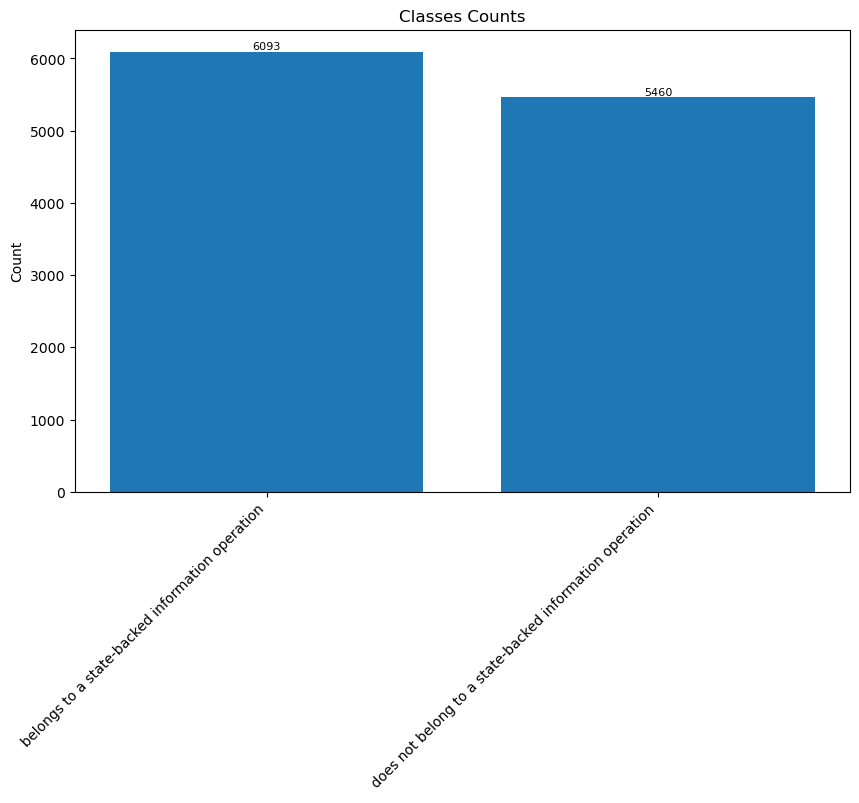

In [1469]:
eda_train.plot_bar_chart(column='completion', title='Classes')

In [1467]:
eda_valid = EDA(valid)

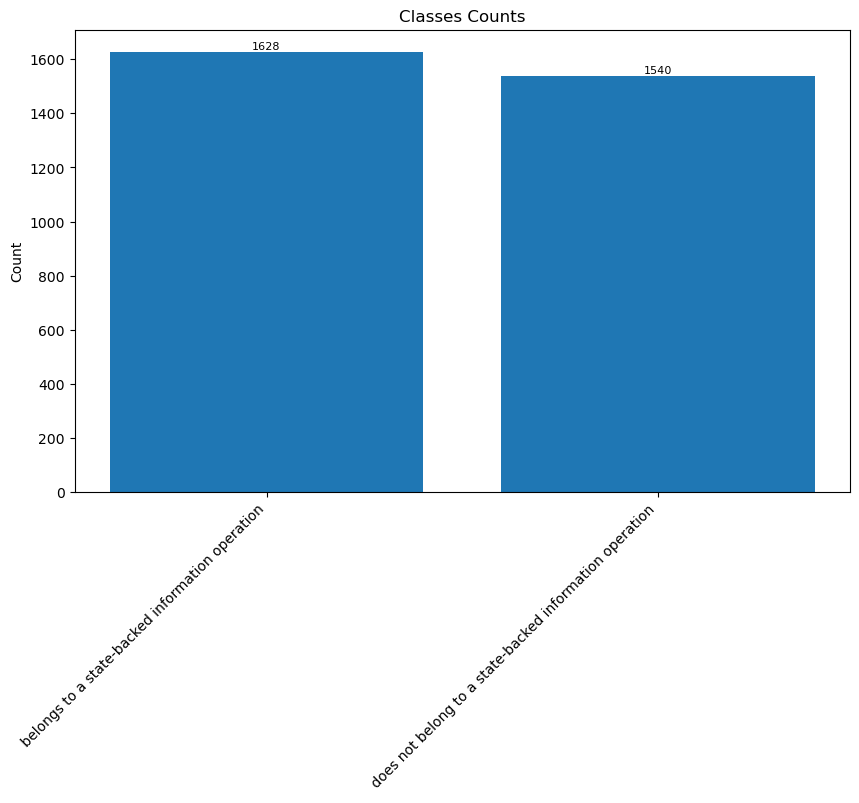

In [1470]:
eda_valid.plot_bar_chart(column='completion', title='Classes')

In [1272]:
train.to_json("train.jsonl", orient='records', lines=True)

In [1273]:
valid.to_json("valid.jsonl", orient='records', lines=True)

In [1274]:
!openai api fine_tunes.create -t "train.jsonl" -v "valid.jsonl" --compute_classification_metrics --classification_positive_class " belongs to a state-backed information operation" -m ada

Upload progress: 100%|████████████████████| 4.08M/4.08M [00:00<00:00, 2.81Git/s]
Uploaded file from train.jsonl: file-uXHK39lNeZWtECv8DrWPSvxC
Upload progress: 100%|█████████████████████| 1.16M/1.16M [00:00<00:00, 669Mit/s]
Uploaded file from valid.jsonl: file-Gqmmv1G3Rbj3h0ppKrepXZqV
Created fine-tune: ft-M4iJ3KgdXmOgvovcEnF1EikW
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-12-07 18:39:37] Created fine-tune: ft-M4iJ3KgdXmOgvovcEnF1EikW
[2023-12-07 18:40:02] Fine-tune costs $1.45
[2023-12-07 18:40:03] Fine-tune enqueued. Queue number: 0
[2023-12-07 18:40:05] Fine-tune started



In [1356]:
!openai api fine_tunes.follow -i ft-M4iJ3KgdXmOgvovcEnF1EikW

[2023-12-07 18:39:37] Created fine-tune: ft-M4iJ3KgdXmOgvovcEnF1EikW
[2023-12-07 18:40:02] Fine-tune costs $1.45
[2023-12-07 18:40:03] Fine-tune enqueued. Queue number: 0
[2023-12-07 18:40:05] Fine-tune started
[2023-12-07 18:46:19] Completed epoch 1/4
[2023-12-07 18:56:55] Completed epoch 3/4
[2023-12-07 19:04:14] Uploaded model: ada:ft-personal-2023-12-08-00-04-14
[2023-12-07 19:04:15] Uploaded result file: file-sJbAwljRbD20dME3ETXgxx2W
[2023-12-07 19:04:16] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m ada:ft-personal-2023-12-08-00-04-14 -p <YOUR_PROMPT>


In [1357]:
!openai api fine_tunes.results -i ft-M4iJ3KgdXmOgvovcEnF1EikW > results.csv

In [1358]:
results = pd.read_csv('results.csv')

In [1359]:
results

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
0,1,2576,16,0.350184,0.0000,0.164286,0.377665,0.0000,0.178571,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4128,32,0.553566,0.0000,0.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6960,48,0.269416,0.0000,0.246479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,11968,64,0.127820,0.0000,0.347222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15952,80,0.122777,0.0000,0.471831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,2885,10971088,46160,0.011669,1.0000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2885,2886,10976352,46176,0.004749,1.0000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2886,2887,10979696,46192,0.009647,1.0000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2887,2888,10981888,46208,0.010015,1.0000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


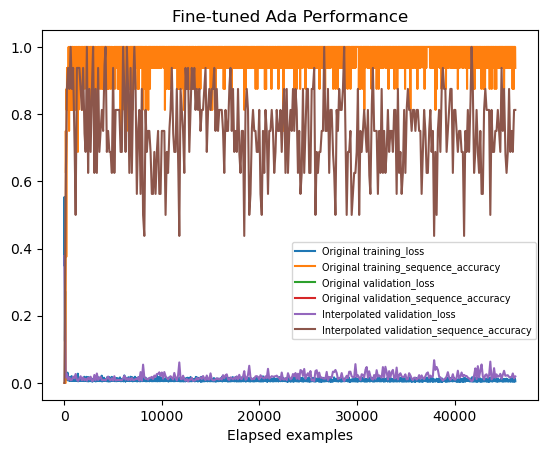

In [1487]:
x_column = 'elapsed_examples'
y_columns = ['training_loss', 'training_sequence_accuracy', 'validation_loss', 'validation_sequence_accuracy']

# Plot the original data
for col in y_columns:
    plt.plot(results[x_column], results[col], label=f'Original {col}')

# Interpolate and plot on the same graph
for col in ['validation_loss', 'validation_sequence_accuracy']:
    plt.plot(results[x_column], results[col].interpolate(), label=f'Interpolated {col}')

plt.title('Fine-tuned Ada Performance')
plt.xlabel('Elapsed examples')
plt.legend(fontsize='x-small', bbox_to_anchor=(0.75, 0.15), loc='lower center')
plt.show()

# Test whether the classifier can generalize to other operations

# Russia GRU (February 2021)

In [1276]:
GRU_path = 'hashed_2020_12_GRU_202012_GRU_202012_tweets_csv_hashed.csv'

In [1277]:
GRU = pd.read_csv(GRU_path)

In [1278]:
GRU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweetid                   26684 non-null  int64  
 1   userid                    26684 non-null  object 
 2   user_display_name         26684 non-null  object 
 3   user_screen_name          26684 non-null  object 
 4   user_reported_location    23183 non-null  object 
 5   user_profile_description  17978 non-null  object 
 6   user_profile_url          6862 non-null   object 
 7   follower_count            26684 non-null  int64  
 8   following_count           26684 non-null  int64  
 9   account_creation_date     26684 non-null  object 
 10  account_language          26684 non-null  object 
 11  tweet_language            26684 non-null  object 
 12  tweet_text                26684 non-null  object 
 13  tweet_time                26684 non-null  object 
 14  tweet_

In [1279]:
eda_gru = EDA(GRU)

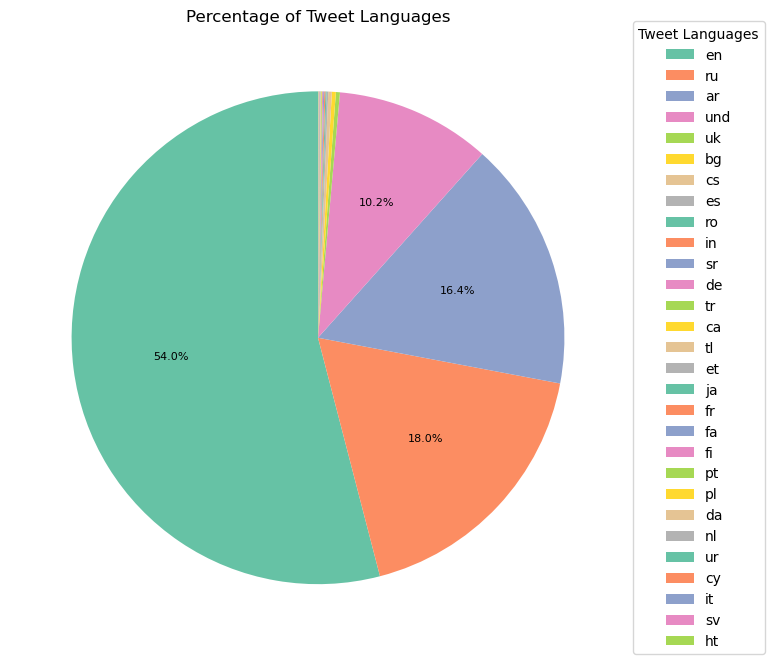

In [1280]:
eda_gru.plot_pie_chart(column='tweet_language', title='Tweet Languages')

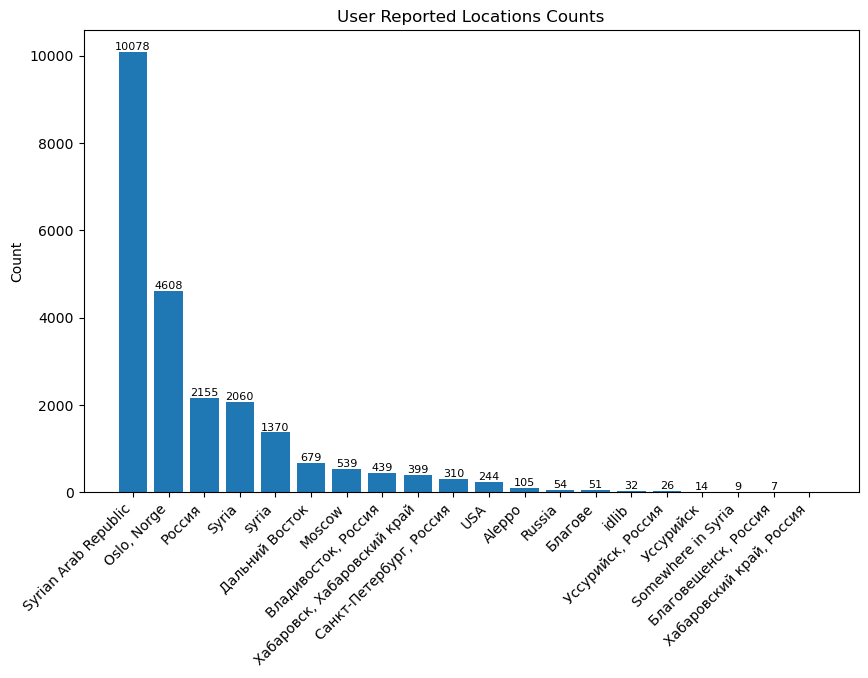

In [1281]:
eda_gru.plot_bar_chart(column='user_reported_location', title='User Reported Locations')

In [1282]:
GRU = preprocess_dataframe(GRU,'tweet_text')

In [1283]:
GRU

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,1229734494892101633,7WTYPcAGruW7ZtKtLorAsQoBkPdRwCt0vtm6931MVE=,7WTYPcAGruW7ZtKtLorAsQoBkPdRwCt0vtm6931MVE=,7WTYPcAGruW7ZtKtLorAsQoBkPdRwCt0vtm6931MVE=,NaN,NaN,NaN,55,169,2020-02-01,...,NaN,absent,absent,0,0,0,0,"['US', 'Syria', 'DeirEzZor', 'helicopters', 'U...",[],[]
1,785633767285141504,jqGSYKkIV+B+ELGTvX+qbrzut5YRGjh9LNi5v5gRP8=,jqGSYKkIV+B+ELGTvX+qbrzut5YRGjh9LNi5v5gRP8=,jqGSYKkIV+B+ELGTvX+qbrzut5YRGjh9LNi5v5gRP8=,"Владивосток, Россия",Свобода слова - это когда называешь вещи своим...,NaN,380,817,2016-10-06,...,NaN,absent,absent,0,0,0,0,[],[],[]
2,1141225696385273856,jqGSYKkIV+B+ELGTvX+qbrzut5YRGjh9LNi5v5gRP8=,jqGSYKkIV+B+ELGTvX+qbrzut5YRGjh9LNi5v5gRP8=,jqGSYKkIV+B+ELGTvX+qbrzut5YRGjh9LNi5v5gRP8=,"Владивосток, Россия",Свобода слова - это когда называешь вещи своим...,NaN,380,817,2016-10-06,...,NaN,absent,absent,0,0,0,0,[],['https://nat-antivirus.livejournal.com/212268...,[]
3,1298485238579056640,qBf+h+wuixptxkrp9LXpR7KQSoNGxJsvvPlkpciS4=,qBf+h+wuixptxkrp9LXpR7KQSoNGxJsvvPlkpciS4=,qBf+h+wuixptxkrp9LXpR7KQSoNGxJsvvPlkpciS4=,NaN,Always try to find out the truth\n\n#Syria #Mi...,NaN,914,450,2020-07-12,...,NaN,absent,absent,0,0,1,0,"['Abu_Hammam', 'Deir_ez_Zor', 'SDF', 'IAC', 'S...",[],[]
4,1298140593734983680,qBf+h+wuixptxkrp9LXpR7KQSoNGxJsvvPlkpciS4=,qBf+h+wuixptxkrp9LXpR7KQSoNGxJsvvPlkpciS4=,qBf+h+wuixptxkrp9LXpR7KQSoNGxJsvvPlkpciS4=,NaN,Always try to find out the truth\n\n#Syria #Mi...,NaN,914,450,2020-07-12,...,NaN,absent,absent,0,0,0,0,"['Russian', 'SDF', 'Ayn_Issa', 'Syrian_Army', ...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26679,1004340724949831681,883565926473486336,Pamela Spenser,PamSpenser,"Oslo, Norge",NaN,https://t.co/hp2YSSx63E,6502,583,2017-07-08,...,NaN,absent,absent,0,0,10,9,"['Syrianarmy', 'Aleppo', 'Terrorists', 'Syria']",[],[]
26680,1001358869132644354,883565926473486336,Pamela Spenser,PamSpenser,"Oslo, Norge",NaN,https://t.co/hp2YSSx63E,6502,583,2017-07-08,...,NaN,absent,absent,0,0,8,5,"['Dera', 'terrorists', 'Syria']",[],[]
26681,982141416179576835,883565926473486336,Pamela Spenser,PamSpenser,"Oslo, Norge",NaN,https://t.co/hp2YSSx63E,6502,583,2017-07-08,...,NaN,absent,absent,0,0,13,8,"['Refugees', 'Euphrates', 'Jnayna', 'Syria', '...",[],[]
26682,979255677850935296,883565926473486336,Pamela Spenser,PamSpenser,"Oslo, Norge",NaN,https://t.co/hp2YSSx63E,6502,583,2017-07-08,...,NaN,absent,absent,5,3,70,54,"['US', 'European', 'Syria', 'EasternGhouta', '...",[],[]


In [1284]:
GRU_tweets = GRU[['tweet_text']]

In [1285]:
GRU_tweets

,tweet_text
0,after the #US convoy in #Syria #DeirEzZor had ...
1,Россия и Турция подписали договор о «Турецком ...
2,«Сила в партнерстве» \nhttps://t.co/VDt4p9RG2F...
3,"In #Abu_Hammam, #Deir_ez_Zor governorate, loca..."
4,#Russian military personnel met with members o...
...,...
26679,The #Syrianarmy inflicted massive blows on the...
26680,The town of Al-Sanamein in the north of the pr...
26681,#Refugees continue coming back home to the Eas...
26682,The #US and a number of #European states are p...


In [893]:
GRU_tweets["embedding"] = GRU_tweets.tweet_text.apply(lambda x: get_embedding(x, engine=embedding_model))

/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/139606056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GRU_tweets["embedding"] = GRU_tweets.tweet_text.apply(lambda x: get_embedding(x, engine=embedding_model))


In [894]:
GRU_tweets

,tweet_text,embedding
0,after the #US convoy in #Syria #DeirEzZor had ...,"[-0.02282562665641308, -0.005596986971795559, ..."
1,Россия и Турция подписали договор о «Турецком ...,"[-0.005408668890595436, -0.0225830115377903, -..."
2,«Сила в партнерстве» \nhttps://t.co/VDt4p9RG2F...,"[-0.007742539048194885, -0.007828567177057266,..."
3,"In #Abu_Hammam, #Deir_ez_Zor governorate, loca...","[-0.009439118206501007, -0.005904527381062508,..."
4,#Russian military personnel met with members o...,"[-0.013801215216517448, -0.004270242992788553,..."
...,...,...
26679,The #Syrianarmy inflicted massive blows on the...,"[-0.03987240046262741, -7.81358903623186e-05, ..."
26680,The town of Al-Sanamein in the north of the pr...,"[-0.00970466434955597, 0.009306115098297596, -..."
26681,#Refugees continue coming back home to the Eas...,"[0.00037530576810240746, -0.003908412996679544..."
26682,The #US and a number of #European states are p...,"[-0.0057268282398581505, 0.012611279264092445,..."


In [895]:
clustering_gru = ClusteringAndThemeExtraction(GRU_tweets, 'embedding')

In [896]:
clustering_gru.perform_clustering()

/Users/hailienguyen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/1764873631.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.tweets_df["Cluster"] = labels


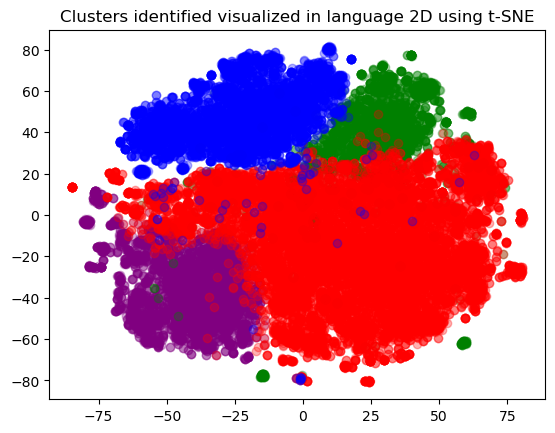

In [1145]:
clustering_gru.visualize_clusters()

In [915]:
clustering_gru.extract_cluster_themes()

Cluster 0 Theme:  The tweets are pushing the narrative of the humanitarian crisis in Syria, the displacement of refugees, and the violence of the Syrian government against its own people.
إن الافتقار الأولي للضروريات الأساسية والمواد الغذائية يهدد أكثر من 60000 من السكان غير المتعمدين في مخيم الرقبان بكارثة إنسانية. تحول المعسكر ، الذي كان مقرًا لعشرات الآلاف من الأشخاص المعدمين ، إلى مرتع للمرض والفقر ، https://t.co/aaLsZA9qZv:   يعود اللاجئون إلى الشاطئ الشرقي لنهر الفرات. بالأمس عاد أكثر من 450 شخص إلى مستوطنة جينا https://t.co/PMk5KRjRdV:   في منطقة خوين الكبير , يتراجع مقاتلي جبهة النصرة تحت قصف مدافع وطائرات القوات الحكومية السورية  
#إدلب #جبهةالنصرة #الجيشالسوري #الحربفيسوريا https://t.co/0jRxcAtFpx:   في محافظة الصويرة ، ناشطون محليون يدعون السكان للمساعدة في التعرف على الظهور المفاجئ لغزة داعش ، التي تم إنشاؤها على الأرجح من قبل الجيش الأمريكي https://t.co/GRESJ3yW9C:   يهاجم المتشددون قوات الحكومة السورية في حلب ويقصفون المستوطنات السلمية ، مما يثير رد فعل من الجيش العربي ال

In [949]:
GRU_tweets.to_csv('GRU_embeddings.csv', index=False)

In [1089]:
import subprocess

def openai_api_completion(df, prompt_column, model):
    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        # Extract the prompt from the specified column
        prompt = row[prompt_column]
        
        # Construct the CLI command with the prompt
        command = f'openai api completions.create -m {model} -p "{prompt}\n\n###\n\n"'
#         print("Command: ",command)
        # Call the CLI command and capture the output
        try:
            completion = subprocess.check_output(command, shell=True, text=True)
            
            # Extract text after "\n\n###\n\n" and record in a new column
            separator = "\n\n###\n\n"
            completion_text = completion.split(separator, 1)[1]
            df.at[index, 'completion'] = completion_text
        except subprocess.CalledProcessError as e:
            # Handle any errors that may occur during the subprocess call
            print(f"Error processing row {index}: {e}")

    return df

In [1286]:
gru_test = GRU[['tweet_text']].sample(1000)

In [1287]:
gru_test

,tweet_text
12350,На Севере Сирии обнаружены британские наемники...
11925,ويتركز حوالي 400 من مقاتلي حياة الشام في بيت س...
15187,Агрессор остается таковым…\nhttps://t.co/RRGxv...
5073,#Hayat_Tahrir_al_Sham #Syria #terrorists #Ahra...
7253,https://t.co/JvI3zOkmY2
...,...
9192,The uproar about the information about terrori...
9269,Гавайское ракетное «фиаско» https://t.co/dFHhY...
25752,"@zaoC5BcbzszeQjW А ничего, что этой новости го..."
13853,The weakening of the positions of the Free Syr...


In [1362]:
result = openai_api_completion(gru_test, 'tweet_text', 'ada:ft-personal-2023-12-08-00-04-14')

Error processing row 17746: Command 'openai api completions.create -m ada:ft-personal-2023-12-08-00-04-14 -p "#SyAF airstrikes over #Sidi `Ali  #SAA #SyAF #militants #terrorism #terrorist #Idlib #Hama #Aleppo #Latakia https://t.co/cjyNqNd6pv

###

"' returned non-zero exit status 2.


/bin/sh: -c: line 0: unexpected EOF while looking for matching ``'
/bin/sh: -c: line 5: syntax error: unexpected end of file


In [1363]:
result

,tweet_text,completion
12350,На Севере Сирии обнаружены британские наемники...,does not belong to a state-backed information...
11925,ويتركز حوالي 400 من مقاتلي حياة الشام في بيت س...,does not belong to a state-backed information...
15187,Агрессор остается таковым…\nhttps://t.co/RRGxv...,does not belong to a state-backed information...
5073,#Hayat_Tahrir_al_Sham #Syria #terrorists #Ahra...,does not belong to a state-backed information...
7253,https://t.co/JvI3zOkmY2,does not belong to a state-backed information...
...,...,...
9192,The uproar about the information about terrori...,does not belong to a state-backed information...
9269,Гавайское ракетное «фиаско» https://t.co/dFHhY...,does not belong to a state-backed information...
25752,"@zaoC5BcbzszeQjW А ничего, что этой новости го...",does not belong to a state-backed information...
13853,The weakening of the positions of the Free Syr...,does not belong to a state-backed information...


In [1364]:
accuracy = (result['completion'].str.contains('belongs to a state-backed').sum() / len(result)) * 100

In [1365]:
accuracy

10.2

# Russia North Africa - RNA (December 2021)

In [1288]:
RNA_path = 'hashed_2021_12_RNA_0621_RNA_0621_tweets_csv_hashed'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(RNA_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
RNA = pd.DataFrame()

# Loop through each CSV file and concatenate to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(RNA_path, csv_file)
    df = pd.read_csv(file_path)
    RNA = pd.concat([RNA, df], ignore_index=True)

In [1289]:
eda_rna = EDA(RNA)

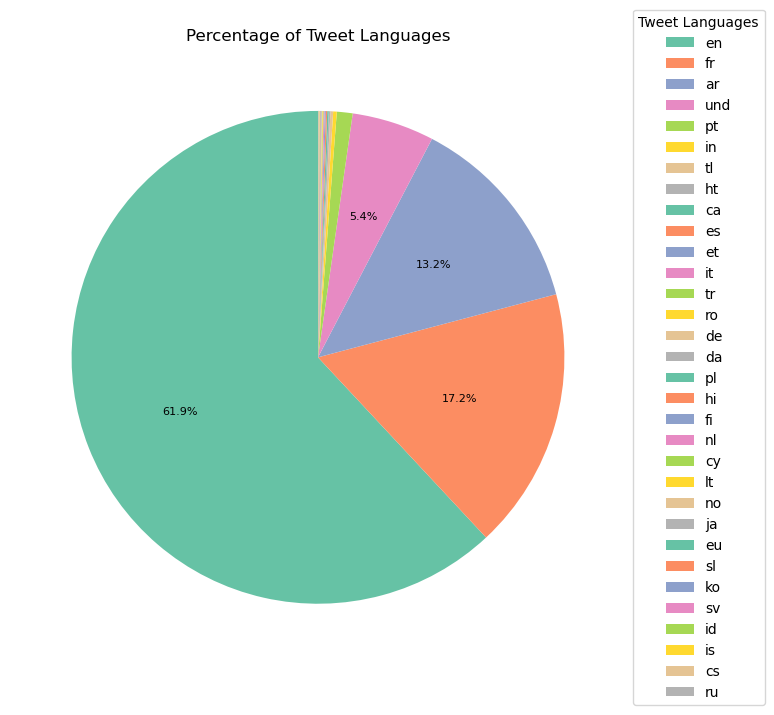

In [1290]:
eda_rna.plot_pie_chart(column='tweet_language', title='Tweet Languages')

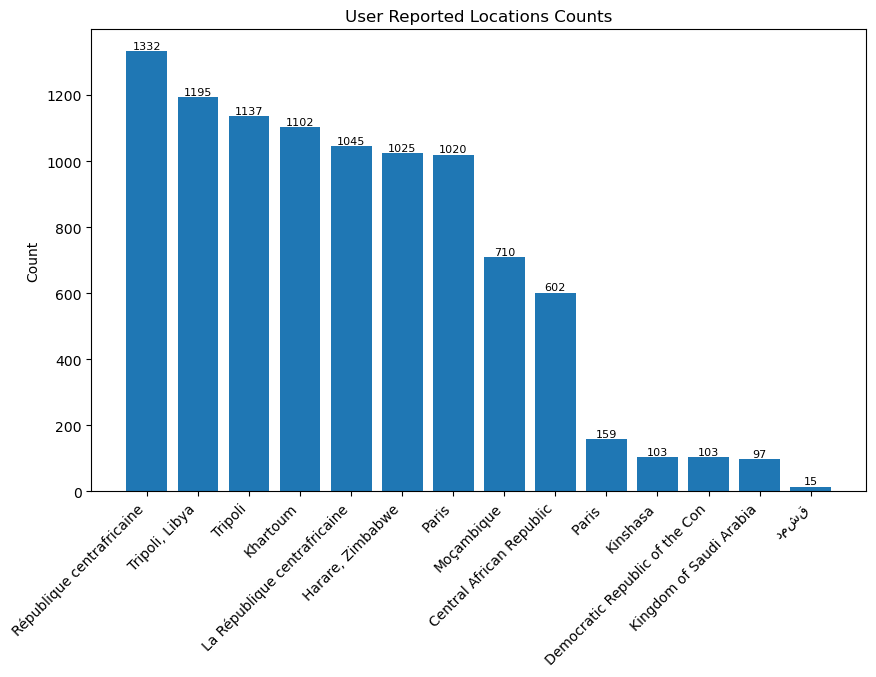

In [1291]:
eda_rna.plot_bar_chart(column='user_reported_location', title='User Reported Locations')

In [1292]:
RNA = preprocess_dataframe(RNA,'tweet_text')

In [1293]:
RNA

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,269795552563191808,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,NaN,NaN,NaN,32,2086,2012-09-20,...,NaN,absent,absent,0,0,0,0,NaN,['http://www.gq.com/moty/2012/rihanna-cover-st...,[]
1,281120941067612161,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,NaN,NaN,NaN,32,2086,2012-09-20,...,NaN,absent,absent,0,0,0,0,NaN,['http://bit.ly/Vjof6l'],[]
2,248832945526284288,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,NaN,NaN,NaN,32,2086,2012-09-20,...,2.488234e+17,absent,absent,0,0,0,0,NaN,['http://ow.ly/dRFNQ'],['40076725']
3,365082069254156288,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,NaN,NaN,NaN,51,398,2013-07-01,...,3.650809e+17,absent,absent,0,0,0,0,NaN,NaN,"['65453567', '1541028344']"
4,376047909948882945,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,NaN,NaN,NaN,51,398,2013-07-01,...,3.760296e+17,absent,absent,0,0,0,0,"['UN', 'Darfur']",['http://ow.ly/oDnGq'],['46003622']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18953,1278972306476412928,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,Paris,"Si vous me demandez il est où ma maison, je vo...",NaN,836,1035,2019-11-18,...,NaN,absent,absent,0,0,1,1,[],[],"['1976143068', '1110890216']"
18954,1243547854477672449,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,Paris,"Si vous me demandez il est où ma maison, je vo...",NaN,836,1035,2019-11-18,...,NaN,absent,absent,0,0,3,0,[],[],[]
18955,1259793825742106626,QfHsWu0gMUdhB5YjAUVDoD9lx7QFvDRje6G7YigUVE4=,QfHsWu0gMUdhB5YjAUVDoD9lx7QFvDRje6G7YigUVE4=,QfHsWu0gMUdhB5YjAUVDoD9lx7QFvDRje6G7YigUVE4=,"Tripoli, Libya",NaN,NaN,73,85,2020-02-03,...,NaN,absent,absent,0,0,0,0,[],[],[]
18956,1238076459341750275,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,Paris,"Si vous me demandez il est où ma maison, je vo...",NaN,836,1035,2019-11-18,...,NaN,absent,absent,0,1,3,1,"['CODVID19', 'IAmLegend']",[],[]


In [1294]:
RNA_tweets = RNA[['tweet_text']]

In [1295]:
RNA_tweets

,tweet_text
0,GQ Obsession of the Year 2012: Men of the Year...
1,Enter now for your chance to win a Samsung Gal...
2,"RT @MTVNews: Black Keys, Foo Fighters and more..."
3,RT @rangamberi: Hon. Chinos at ZPF HQ earlier ...
4,RT @UNPeacekeeping: AU-#UN Mission in #Darfur ...
...,...
18953,Le président @EmmanuelMacron choisit «nouveau ...
18954,3 mars: Boris Johnson: Je me suis serré la mai...
18955,والله صحيح
18956,"Litalie semble vide absolu, comme un de ces fi..."


In [907]:
RNA_tweets["embedding"] = RNA_tweets.tweet_text.apply(lambda x: get_embedding(x, engine=embedding_model))

/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/2873501220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RNA_tweets["embedding"] = RNA_tweets.tweet_text.apply(lambda x: get_embedding(x, engine=embedding_model))


In [908]:
RNA_tweets

,tweet_text,embedding
0,GQ Obsession of the Year 2012: Men of the Year...,"[-0.0183501448482275, 0.006195981055498123, 0...."
1,Enter now for your chance to win a Samsung Gal...,"[0.0013912128051742911, -0.0015271406155079603..."
2,"RT @MTVNews: Black Keys, Foo Fighters and more...","[-0.014050786383450031, -0.031786590814590454,..."
3,RT @rangamberi: Hon. Chinos at ZPF HQ earlier ...,"[0.0019034185679629445, -0.0032127767335623503..."
4,RT @UNPeacekeeping: AU-#UN Mission in #Darfur ...,"[-0.009601937606930733, -0.010691092349588871,..."
...,...,...
18953,Le président @EmmanuelMacron choisit «nouveau ...,"[-0.011322157457470894, -0.020075475797057152,..."
18954,3 mars: Boris Johnson: Je me suis serré la mai...,"[-0.030476778745651245, -0.00227535143494606, ..."
18955,والله صحيح,"[0.0024970071390271187, 0.0022725570015609264,..."
18956,"Litalie semble vide absolu, comme un de ces fi...","[-0.007651389576494694, -0.01114441454410553, ..."


In [909]:
clustering_rna = ClusteringAndThemeExtraction(RNA_tweets, 'embedding')

In [910]:
clustering_rna.perform_clustering()

/Users/hailienguyen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/1764873631.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.tweets_df["Cluster"] = labels


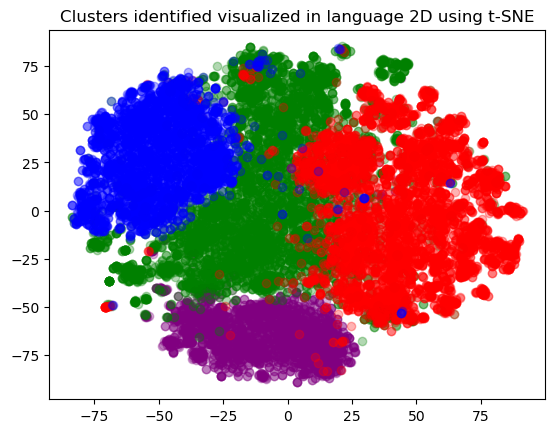

In [1146]:
clustering_rna.visualize_clusters()

In [916]:
clustering_rna.extract_cluster_themes()

Cluster 0 Theme:  The tweets are pushing the narrative of peaceful protest and non-violence. They are also advocating for people to take responsibility for their actions and to not rely on negotiations. Finally, they are promoting the Sudan Uprising and calling for people to join the movement.
@Moon8814342567 هذه الاية كانت لما كان الخمر لم يحرم وكان الله يحرمه تدريجيا.. 
لكن المهم ان لا يؤذي المسلم شخصا اخر.. الخمر والزنا و الخنزير أمر بين الانسان وربه، لكن ان تؤذي الاخرين فهذا ليس مسلما:   RT @JayshKarama: دقة الضرب والقصف الجوي للجيش الليبي. 
تجييف خمسة عناصر من الميليشيات كانت تترصد للمواطنين وتحاول ضرب الجيش. 
في رمشة عين ت…:   @Quickmaintenan0 لا والله مش قصدي .... ومفيش واحد عارف وين مكانه كيف نديرله دعاية؟:   RT @Dr_s3daby: ثريد:-
كتير بس حاول تقرأ...

(عشان ما نندم زي ما ندمنا على فض الاعتصام) 

فعليا الناس لازم تعمل حسابها وتنسى موضوع التفاوض ا…:   RT @YOUSRA12312: #مليونيه30يونيو 
#مليونية30يونيو 
#SudanUprising https://t.co/WIVLuXegYQ:   ------------------------------------

In [921]:
RNA_tweets.to_csv('RNA_embeddings.csv',index=False)

In [1296]:
rna_test = RNA_tweets.sample(1000)[['tweet_text']]

In [1297]:
rna_test

,tweet_text
6724,"Good morning, folks ☀️🌄\n#SaturdayMorning http..."
3304,❗️The RSF said that the talk of searching hous...
16625,@Ayman63270506 ههههههههههههههههه
12672,Ministre des Finances Henri-Marie Dondra a vis...
18360,#Damascus Governorate has allowed a number of ...
...,...
13837,RT @JayshKarama: الطفل الذي قالت حكومة #الوفاق...
17373,@FlamingoMoz Peace is mentioned in all the spe...
18419,National Environment Day was held yesterday un...
10531,Evening in #Damascus 🌆 https://t.co/xNolH7ZgqE


In [1493]:
result_rna = openai_api_completion(rna_test, 'tweet_text', 'ada:ft-personal-2023-12-08-00-04-14')

In [1494]:
result_rna

,tweet_text,true_label,completion
6724,"Good morning, folks ☀️🌄\n#SaturdayMorning http...",belongs to a state-backed information operation,does not belong to a state-backed information...
3304,❗️The RSF said that the talk of searching hous...,belongs to a state-backed information operation,belongs to a state-backed information operati...
16625,@Ayman63270506 ههههههههههههههههه,belongs to a state-backed information operation,does not belong to a state-backed information...
12672,Ministre des Finances Henri-Marie Dondra a vis...,belongs to a state-backed information operation,does not belong to a state-backed information...
18360,#Damascus Governorate has allowed a number of ...,belongs to a state-backed information operation,belongs to a state-backed information operati...
...,...,...,...
13837,RT @JayshKarama: الطفل الذي قالت حكومة #الوفاق...,belongs to a state-backed information operation,does not belong to a state-backed information...
17373,@FlamingoMoz Peace is mentioned in all the spe...,belongs to a state-backed information operation,does not belong to a state-backed information...
18419,National Environment Day was held yesterday un...,belongs to a state-backed information operation,belongs to a state-backed information operati...
10531,Evening in #Damascus 🌆 https://t.co/xNolH7ZgqE,belongs to a state-backed information operation,does not belong to a state-backed information...


In [1495]:
accuracy_rna = (result_rna['completion'].str.contains('belongs to a state-backed').sum() / len(result_rna)) * 100

In [1496]:
accuracy_rna

29.299999999999997

In [1298]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report

def calculate_and_visualize_metrics(df):
    """
    Calculate classification metrics and visualize the confusion matrix.

    Parameters:
    - df: DataFrame with 'true_label' and 'completion' columns

    Returns:
    - metrics_dict: Dictionary containing classification metrics
    """
    # Extract the first 15 characters of the 'true_label' and 'completion' columns
    y_true = df['true_label']
    y_pred = df['completion']

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate precision, recall, accuracy, and F1 score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Generate a detailed classification report
    report = classification_report(y_true, y_pred)

    # Create a dictionary to store the metrics
    metrics_dict = {
        'confusion_matrix': cm,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'f1_score': f1,
        'classification_report': report
    }

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    return metrics_dict

In [1373]:
random_test = random.sample(500)

In [1374]:
random_test = random_test.rename(columns={'tweet': 'text'})

In [1383]:
dips_ru_test = dip_ru.sample(250)

In [1384]:
dips_ru_test = dips_ru_test[['text']]

In [1385]:
dip_cn_test = dip_cn.sample(250)

In [1386]:
dip_cn_test = dip_cn_test[['text']]

In [1387]:
nonio_test = pd.concat([random_test,dips_ru_test,dip_cn_test]).reset_index().drop(columns=['index'])

In [1388]:
nonio_test

,text
0,@jenalfano you got a video of gary? Wow! I tri...
1,1st day pre bday celebration with d family
2,"@Leafybear Morning, pretty quiet this morning,..."
3,@LivCanRawr french fries sound delicious
4,Calc homework.
...,...
995,🤦‍♂️ https://t.co/ddXbVdkwU9
996,“一起向未来”，“迎奥运、促和平”#OlympicsForPeace https://t.c...
997,"@CMorenoToscano1 Muchas gracias, Estimada subs..."
998,The Three-Body Trilogy series of sci-fi bestse...


In [1389]:
test_overlap = pd.merge(nonio_test, nonio_sample, left_on='text', right_on='prompt', how='inner')

In [1390]:
test_overlap

,text,prompt,completion
0,@Tim_in_NH Thanks Tim! The liberal folks had m...,@Tim_in_NH Thanks Tim! The liberal folks had m...,does not belong to a state-backed information...
1,!@DJROCKT I missed the joke of the day!,!@DJROCKT I missed the joke of the day!,does not belong to a state-backed information...
2,15 февраля в Москве пройдут переговоры Владими...,15 февраля в Москве пройдут переговоры Владими...,does not belong to a state-backed information...
3,RT @rusconskrakow: 15 января 1945 года в ходе ...,RT @rusconskrakow: 15 января 1945 года в ходе ...,does not belong to a state-backed information...
4,"🇷🇺🇬🇧 On February 10, FM Sergey #Lavrov held ta...","🇷🇺🇬🇧 On February 10, FM Sergey #Lavrov held ta...",does not belong to a state-backed information...
5,"🇷🇺Сегодня, 2️⃣3️⃣февраля в России государствен...","🇷🇺Сегодня, 2️⃣3️⃣февраля в России государствен...",does not belong to a state-backed information...
6,"🇷🇺 Der Botschafter Russlands in Österreich, Dm...","🇷🇺 Der Botschafter Russlands in Österreich, Dm...",does not belong to a state-backed information...
7,"RT @mfa_russia: ❗ All these years, the UN Secr...","RT @mfa_russia: ❗ All these years, the UN Secr...",does not belong to a state-backed information...
8,Diplomáticos de la Embajada de #Rusia en #Ecua...,Diplomáticos de la Embajada de #Rusia en #Ecua...,does not belong to a state-backed information...
9,"RT @ivan_8848: The Greeks, who are in the base...","RT @ivan_8848: The Greeks, who are in the base...",does not belong to a state-backed information...


In [1391]:
nonio_test = nonio_test[~nonio_test.isin(test_overlap.to_dict(orient='list')).all(axis=1)]

In [1392]:
nonio_test

,text
0,@jenalfano you got a video of gary? Wow! I tri...
1,1st day pre bday celebration with d family
2,"@Leafybear Morning, pretty quiet this morning,..."
3,@LivCanRawr french fries sound delicious
4,Calc homework.
...,...
995,🤦‍♂️ https://t.co/ddXbVdkwU9
996,“一起向未来”，“迎奥运、促和平”#OlympicsForPeace https://t.c...
997,"@CMorenoToscano1 Muchas gracias, Estimada subs..."
998,The Three-Body Trilogy series of sci-fi bestse...


In [1393]:
test2_overlap = pd.merge(nonio_test, nonio_sample, left_on='text', right_on='prompt', how='inner')

In [1394]:
test2_overlap

,text,prompt,completion


In [1395]:
nonio_test['true_label'] = ' does not belong to a state-backed information operation'

/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/1486726302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonio_test['true_label'] = ' does not belong to a state-backed information operation'


In [1396]:
nonio_test = nonio_test.rename(columns={'text': 'tweet_text'})

In [1397]:
nonio_test

,tweet_text,true_label
0,@jenalfano you got a video of gary? Wow! I tri...,does not belong to a state-backed information...
1,1st day pre bday celebration with d family,does not belong to a state-backed information...
2,"@Leafybear Morning, pretty quiet this morning,...",does not belong to a state-backed information...
3,@LivCanRawr french fries sound delicious,does not belong to a state-backed information...
4,Calc homework.,does not belong to a state-backed information...
...,...,...
995,🤦‍♂️ https://t.co/ddXbVdkwU9,does not belong to a state-backed information...
996,“一起向未来”，“迎奥运、促和平”#OlympicsForPeace https://t.c...,does not belong to a state-backed information...
997,"@CMorenoToscano1 Muchas gracias, Estimada subs...",does not belong to a state-backed information...
998,The Three-Body Trilogy series of sci-fi bestse...,does not belong to a state-backed information...


In [1398]:
rna_test['true_label'] = ' belongs to a state-backed information operation'

In [1399]:
rna_test

,tweet_text,completion,true_label
6724,"Good morning, folks ☀️🌄\n#SaturdayMorning http...",does not belong to a state-backed information...,belongs to a state-backed information operation
3304,❗️The RSF said that the talk of searching hous...,belongs to a state-backed information operati...,belongs to a state-backed information operation
16625,@Ayman63270506 ههههههههههههههههه,does not belong to a state-backed information...,belongs to a state-backed information operation
12672,Ministre des Finances Henri-Marie Dondra a vis...,does not belong to a state-backed information...,belongs to a state-backed information operation
18360,#Damascus Governorate has allowed a number of ...,does not belong to a state-backed information...,belongs to a state-backed information operation
...,...,...,...
13837,RT @JayshKarama: الطفل الذي قالت حكومة #الوفاق...,does not belong to a state-backed information...,belongs to a state-backed information operation
17373,@FlamingoMoz Peace is mentioned in all the spe...,does not belong to a state-backed information...,belongs to a state-backed information operation
18419,National Environment Day was held yesterday un...,belongs to a state-backed information operati...,belongs to a state-backed information operation
10531,Evening in #Damascus 🌆 https://t.co/xNolH7ZgqE,does not belong to a state-backed information...,belongs to a state-backed information operation


In [1400]:
rna_test.drop(['completion'], axis=1, inplace=True)

In [1401]:
rna_test

,tweet_text,true_label
6724,"Good morning, folks ☀️🌄\n#SaturdayMorning http...",belongs to a state-backed information operation
3304,❗️The RSF said that the talk of searching hous...,belongs to a state-backed information operation
16625,@Ayman63270506 ههههههههههههههههه,belongs to a state-backed information operation
12672,Ministre des Finances Henri-Marie Dondra a vis...,belongs to a state-backed information operation
18360,#Damascus Governorate has allowed a number of ...,belongs to a state-backed information operation
...,...,...
13837,RT @JayshKarama: الطفل الذي قالت حكومة #الوفاق...,belongs to a state-backed information operation
17373,@FlamingoMoz Peace is mentioned in all the spe...,belongs to a state-backed information operation
18419,National Environment Day was held yesterday un...,belongs to a state-backed information operation
10531,Evening in #Damascus 🌆 https://t.co/xNolH7ZgqE,belongs to a state-backed information operation


In [1402]:
test = pd.concat([rna_test,nonio_test]).sample(frac=1, random_state=42).reset_index().drop('index',axis=1)

In [1403]:
test

,tweet_text,true_label
0,yah not looking forward to that part so much.....,does not belong to a state-backed information...
1,RT @JayshKarama: حافلتان تحمل عناصر ميليشيا #ع...,belongs to a state-backed information operation
2,Une mission de conciliation sera envoyée à #Nd...,belongs to a state-backed information operation
3,President #Putin: #Russia-#China relations of ...,does not belong to a state-backed information...
4,🇷🇺📢Переговоры с главой МИД #РФ Сергеем #Лавров...,does not belong to a state-backed information...
...,...,...
1975,@honorsociety why cant you go &quot;full moon ...,does not belong to a state-backed information...
1976,has a full day of work ahead of him,does not belong to a state-backed information...
1977,#SAA #Idlib,belongs to a state-backed information operation
1978,@chrisbrogan iffen yer looking for a hit post ...,does not belong to a state-backed information...


In [1404]:
test.to_csv('test_final.csv',index=False)

In [1405]:
final_results_rea = openai_api_completion(test, 'tweet_text', 'ada:ft-personal-2023-12-08-00-04-14')

/bin/sh: s: command not found


In [1406]:
final_results_rea

,tweet_text,true_label,completion
0,yah not looking forward to that part so much.....,does not belong to a state-backed information...,does not belong to a state-backed information...
1,RT @JayshKarama: حافلتان تحمل عناصر ميليشيا #ع...,belongs to a state-backed information operation,does not belong to a state-backed information...
2,Une mission de conciliation sera envoyée à #Nd...,belongs to a state-backed information operation,does not belong to a state-backed information...
3,President #Putin: #Russia-#China relations of ...,does not belong to a state-backed information...,does not belong to a state-backed information...
4,🇷🇺📢Переговоры с главой МИД #РФ Сергеем #Лавров...,does not belong to a state-backed information...,does not belong to a state-backed information...
...,...,...,...
1975,@honorsociety why cant you go &quot;full moon ...,does not belong to a state-backed information...,does not belong to a state-backed information...
1976,has a full day of work ahead of him,does not belong to a state-backed information...,does not belong to a state-backed information...
1977,#SAA #Idlib,belongs to a state-backed information operation,does not belong to a state-backed information...
1978,@chrisbrogan iffen yer looking for a hit post ...,does not belong to a state-backed information...,does not belong to a state-backed information...


In [1407]:
viz_results_rea = final_results_rea.copy()

In [1408]:
viz_results_rea

,tweet_text,true_label,completion
0,yah not looking forward to that part so much.....,does not belong to a state-backed information...,does not belong to a state-backed information...
1,RT @JayshKarama: حافلتان تحمل عناصر ميليشيا #ع...,belongs to a state-backed information operation,does not belong to a state-backed information...
2,Une mission de conciliation sera envoyée à #Nd...,belongs to a state-backed information operation,does not belong to a state-backed information...
3,President #Putin: #Russia-#China relations of ...,does not belong to a state-backed information...,does not belong to a state-backed information...
4,🇷🇺📢Переговоры с главой МИД #РФ Сергеем #Лавров...,does not belong to a state-backed information...,does not belong to a state-backed information...
...,...,...,...
1975,@honorsociety why cant you go &quot;full moon ...,does not belong to a state-backed information...,does not belong to a state-backed information...
1976,has a full day of work ahead of him,does not belong to a state-backed information...,does not belong to a state-backed information...
1977,#SAA #Idlib,belongs to a state-backed information operation,does not belong to a state-backed information...
1978,@chrisbrogan iffen yer looking for a hit post ...,does not belong to a state-backed information...,does not belong to a state-backed information...


In [1409]:
viz_results_rea['true_label'][1][:8]==' belongs'

True

In [1413]:
viz_results_rea['true_label'] = np.where(viz_results_rea['true_label'].str[:8] == " belongs", 1, 0)

In [1414]:
viz_results_rea

,tweet_text,true_label,completion
0,yah not looking forward to that part so much.....,0,does not belong to a state-backed information...
1,RT @JayshKarama: حافلتان تحمل عناصر ميليشيا #ع...,1,does not belong to a state-backed information...
2,Une mission de conciliation sera envoyée à #Nd...,1,does not belong to a state-backed information...
3,President #Putin: #Russia-#China relations of ...,0,does not belong to a state-backed information...
4,🇷🇺📢Переговоры с главой МИД #РФ Сергеем #Лавров...,0,does not belong to a state-backed information...
...,...,...,...
1975,@honorsociety why cant you go &quot;full moon ...,0,does not belong to a state-backed information...
1976,has a full day of work ahead of him,0,does not belong to a state-backed information...
1977,#SAA #Idlib,1,does not belong to a state-backed information...
1978,@chrisbrogan iffen yer looking for a hit post ...,0,does not belong to a state-backed information...


In [1415]:
viz_results_rea['completion'] = np.where(viz_results_rea['completion'].str[:8] == " belongs", 1, 0)

In [1416]:
viz_results_rea

,tweet_text,true_label,completion
0,yah not looking forward to that part so much.....,0,0
1,RT @JayshKarama: حافلتان تحمل عناصر ميليشيا #ع...,1,0
2,Une mission de conciliation sera envoyée à #Nd...,1,0
3,President #Putin: #Russia-#China relations of ...,0,0
4,🇷🇺📢Переговоры с главой МИД #РФ Сергеем #Лавров...,0,0
...,...,...,...
1975,@honorsociety why cant you go &quot;full moon ...,0,0
1976,has a full day of work ahead of him,0,0
1977,#SAA #Idlib,1,0
1978,@chrisbrogan iffen yer looking for a hit post ...,0,0


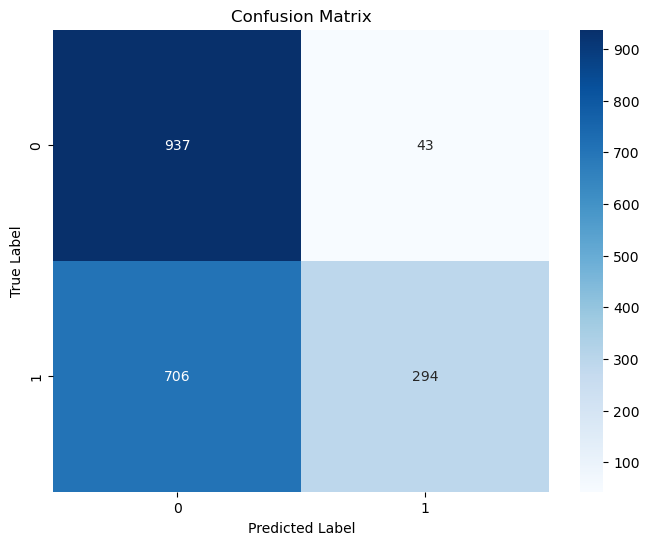

In [1418]:
metrics_dict = calculate_and_visualize_metrics(viz_results_rea)

In [1419]:
metrics_dict['precision']

0.8724035608308606

In [1420]:
metrics_dict['recall']

0.294

In [1421]:
metrics_dict['accuracy']

0.6217171717171717

In [1422]:
metrics_dict['f1_score']

0.43979057591623033

# Fine tuning on 2 operations (REA and CNHU)

In [1299]:
cnhu_path = 'hashed_2021_12_CNHU_0621_CNHU_0621_tweets_csv_hashed'

In [1300]:
# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(cnhu_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
CNHU = pd.DataFrame()

# Loop through each CSV file and concatenate to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(cnhu_path, csv_file)
    df = pd.read_csv(file_path)
    CNHU = pd.concat([CNHU, df], ignore_index=True)

In [1301]:
CNHU

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,1372537056165949449,Dauog8ymHFUXSKwzt8naraYR6e4jM0+ICMvAW6WF4=,Dauog8ymHFUXSKwzt8naraYR6e4jM0+ICMvAW6WF4=,Dauog8ymHFUXSKwzt8naraYR6e4jM0+ICMvAW6WF4=,NaN,NaN,NaN,0,41,2021-02-03,...,NaN,absent,absent,0,0,0,0,[],['http://www.china.org.cn/china/2021-03/18/con...,[]
1,1352228496928489473,wwqN85E4TpJz940ZhGMXT9hHzaZktIMHhKzO5MEtrQ8=,wwqN85E4TpJz940ZhGMXT9hHzaZktIMHhKzO5MEtrQ8=,wwqN85E4TpJz940ZhGMXT9hHzaZktIMHhKzO5MEtrQ8=,NaN,NaN,NaN,0,4,2020-03-31,...,NaN,absent,absent,0,0,0,0,['xinjiang'],['http://t.m.china.org.cn/convert/c_x8BDSHzU.h...,['519776488']
2,1376520717101981698,L79Sf+PJs22opJ9XcbIvayfuQBz7Jh6IicSFlb5pk=,L79Sf+PJs22opJ9XcbIvayfuQBz7Jh6IicSFlb5pk=,L79Sf+PJs22opJ9XcbIvayfuQBz7Jh6IicSFlb5pk=,NaN,NaN,NaN,0,13,2021-01-17,...,NaN,absent,absent,0,0,0,0,[],['https://news.cgtn.com/news/2021-03-29/Live-C...,[]
3,1351826176948449281,ZGzDnZFhF3JZpFxFh8nnpaIFi93lpbC7piph1DV8Vjw=,ZGzDnZFhF3JZpFxFh8nnpaIFi93lpbC7piph1DV8Vjw=,ZGzDnZFhF3JZpFxFh8nnpaIFi93lpbC7piph1DV8Vjw=,NaN,NaN,NaN,0,8,2019-12-24,...,NaN,absent,absent,0,0,0,0,"['Xinjiang', 'XinjiangOnline']",['http://t.m.china.org.cn/convert/c_x8BDSHzU.h...,[]
4,1363468069587230722,ARGkwKKMG5YzTvpSYdmiPiPNeab1sDTY5XobIkyYAlw=,ARGkwKKMG5YzTvpSYdmiPiPNeab1sDTY5XobIkyYAlw=,ARGkwKKMG5YzTvpSYdmiPiPNeab1sDTY5XobIkyYAlw=,NaN,NaN,NaN,3,115,2021-01-08,...,NaN,absent,absent,0,0,0,0,['Xinjiang'],['http://www.china.org.cn/china/2021-02/20/con...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31264,1196874851673235456,vWFdShHmpEoN6cPbY4Vsz4hZmLOcfgUaniV6S6wKk=,vWFdShHmpEoN6cPbY4Vsz4hZmLOcfgUaniV6S6wKk=,vWFdShHmpEoN6cPbY4Vsz4hZmLOcfgUaniV6S6wKk=,NaN,NaN,NaN,1,1,2019-11-15,...,NaN,absent,absent,0,0,0,0,[],[],[]
31265,1196101830658256897,PPPujN74hOP+Lr2NnWaYfZuefWmYN3sKykKtb+TyRY=,PPPujN74hOP+Lr2NnWaYfZuefWmYN3sKykKtb+TyRY=,PPPujN74hOP+Lr2NnWaYfZuefWmYN3sKykKtb+TyRY=,NaN,NaN,NaN,0,4,2019-11-15,...,NaN,absent,absent,0,0,0,0,[],[],[]
31266,1212118193487015936,3kS5p2hzGFuXgyZNDV8b4b+NoNRbK31S5RMAN9wmXg=,3kS5p2hzGFuXgyZNDV8b4b+NoNRbK31S5RMAN9wmXg=,3kS5p2hzGFuXgyZNDV8b4b+NoNRbK31S5RMAN9wmXg=,NaN,NaN,NaN,0,0,2019-12-30,...,NaN,absent,absent,0,0,0,0,[],[],[]
31267,1208537399678001152,E58rWnCIj++ZHjbEGEjvKK3z1+ruGQwy1QFC3ybHwk=,E58rWnCIj++ZHjbEGEjvKK3z1+ruGQwy1QFC3ybHwk=,E58rWnCIj++ZHjbEGEjvKK3z1+ruGQwy1QFC3ybHwk=,NaN,NaN,NaN,2,17,2019-12-21,...,NaN,absent,absent,0,0,0,0,[],[],[]


In [1302]:
eda_cnhu = EDA(CNHU)

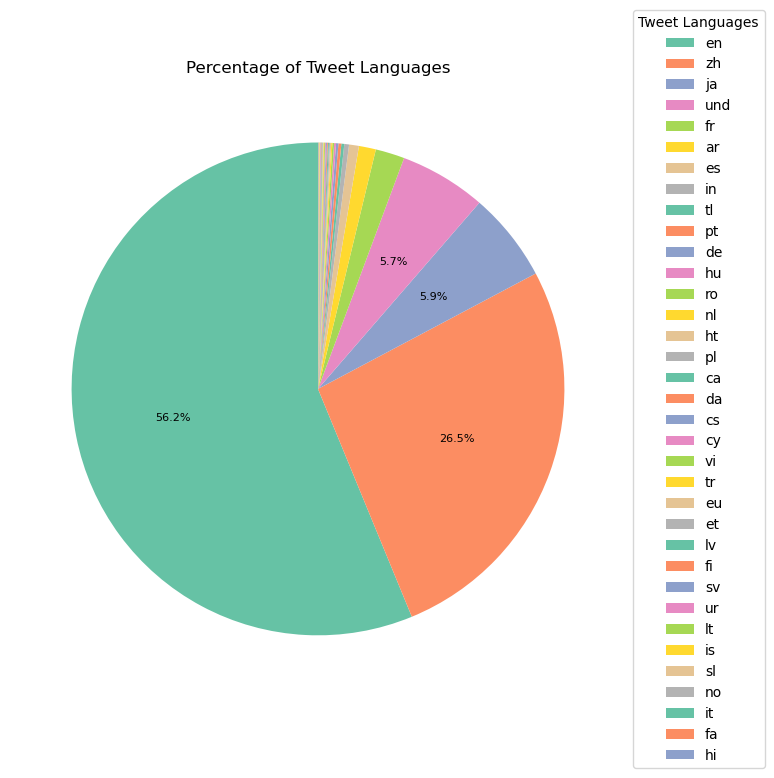

In [1303]:
eda_cnhu.plot_pie_chart(column='tweet_language', title='Tweet Languages')

In [1304]:
CNHU = preprocess_dataframe(CNHU,'tweet_text')

In [1305]:
CNHU

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,1372537056165949449,Dauog8ymHFUXSKwzt8naraYR6e4jM0+ICMvAW6WF4=,Dauog8ymHFUXSKwzt8naraYR6e4jM0+ICMvAW6WF4=,Dauog8ymHFUXSKwzt8naraYR6e4jM0+ICMvAW6WF4=,NaN,NaN,NaN,0,41,2021-02-03,...,NaN,absent,absent,0,0,0,0,[],['http://www.china.org.cn/china/2021-03/18/con...,[]
1,1352228496928489473,wwqN85E4TpJz940ZhGMXT9hHzaZktIMHhKzO5MEtrQ8=,wwqN85E4TpJz940ZhGMXT9hHzaZktIMHhKzO5MEtrQ8=,wwqN85E4TpJz940ZhGMXT9hHzaZktIMHhKzO5MEtrQ8=,NaN,NaN,NaN,0,4,2020-03-31,...,NaN,absent,absent,0,0,0,0,['xinjiang'],['http://t.m.china.org.cn/convert/c_x8BDSHzU.h...,['519776488']
2,1376520717101981698,L79Sf+PJs22opJ9XcbIvayfuQBz7Jh6IicSFlb5pk=,L79Sf+PJs22opJ9XcbIvayfuQBz7Jh6IicSFlb5pk=,L79Sf+PJs22opJ9XcbIvayfuQBz7Jh6IicSFlb5pk=,NaN,NaN,NaN,0,13,2021-01-17,...,NaN,absent,absent,0,0,0,0,[],['https://news.cgtn.com/news/2021-03-29/Live-C...,[]
3,1351826176948449281,ZGzDnZFhF3JZpFxFh8nnpaIFi93lpbC7piph1DV8Vjw=,ZGzDnZFhF3JZpFxFh8nnpaIFi93lpbC7piph1DV8Vjw=,ZGzDnZFhF3JZpFxFh8nnpaIFi93lpbC7piph1DV8Vjw=,NaN,NaN,NaN,0,8,2019-12-24,...,NaN,absent,absent,0,0,0,0,"['Xinjiang', 'XinjiangOnline']",['http://t.m.china.org.cn/convert/c_x8BDSHzU.h...,[]
4,1363468069587230722,ARGkwKKMG5YzTvpSYdmiPiPNeab1sDTY5XobIkyYAlw=,ARGkwKKMG5YzTvpSYdmiPiPNeab1sDTY5XobIkyYAlw=,ARGkwKKMG5YzTvpSYdmiPiPNeab1sDTY5XobIkyYAlw=,NaN,NaN,NaN,3,115,2021-01-08,...,NaN,absent,absent,0,0,0,0,['Xinjiang'],['http://www.china.org.cn/china/2021-02/20/con...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31263,1200778890676801536,afuAsGC29MRLpIaxS2FJoJOIyZcU8Pa4jNia32pTRRY=,afuAsGC29MRLpIaxS2FJoJOIyZcU8Pa4jNia32pTRRY=,afuAsGC29MRLpIaxS2FJoJOIyZcU8Pa4jNia32pTRRY=,NaN,NaN,NaN,0,1,2019-11-30,...,NaN,absent,absent,0,0,0,0,[],[],[]
31264,1196874851673235456,vWFdShHmpEoN6cPbY4Vsz4hZmLOcfgUaniV6S6wKk=,vWFdShHmpEoN6cPbY4Vsz4hZmLOcfgUaniV6S6wKk=,vWFdShHmpEoN6cPbY4Vsz4hZmLOcfgUaniV6S6wKk=,NaN,NaN,NaN,1,1,2019-11-15,...,NaN,absent,absent,0,0,0,0,[],[],[]
31265,1196101830658256897,PPPujN74hOP+Lr2NnWaYfZuefWmYN3sKykKtb+TyRY=,PPPujN74hOP+Lr2NnWaYfZuefWmYN3sKykKtb+TyRY=,PPPujN74hOP+Lr2NnWaYfZuefWmYN3sKykKtb+TyRY=,NaN,NaN,NaN,0,4,2019-11-15,...,NaN,absent,absent,0,0,0,0,[],[],[]
31266,1212118193487015936,3kS5p2hzGFuXgyZNDV8b4b+NoNRbK31S5RMAN9wmXg=,3kS5p2hzGFuXgyZNDV8b4b+NoNRbK31S5RMAN9wmXg=,3kS5p2hzGFuXgyZNDV8b4b+NoNRbK31S5RMAN9wmXg=,NaN,NaN,NaN,0,0,2019-12-30,...,NaN,absent,absent,0,0,0,0,[],[],[]


In [1306]:
CNHU_tweets = CNHU[['tweet_text']]

In [1307]:
CNHU_tweets

,tweet_text
0,Top political advisor stresses enduring stabil...
1,Vocational education and training is key measu...
2,Live: Chinas Foreign Ministry holds press conf...
3,#Xinjiang #XinjiangOnline Vocational education...
4,stories from #Xinjiang: Pamir bride and painte...
...,...
31263,"Be strong, and climb the peak, overcome inferi..."
31264,Too many cooks spoil the broth https://t.co/ZW...
31265,Good beginning makes a good ending - A https:/...
31266,"The mountain does not speak the soil, therefor..."


In [938]:
CNHU_tweets["embedding"] = CNHU_tweets.tweet_text.apply(lambda x: get_embedding(x, engine=embedding_model))

/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/3599721647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CNHU_tweets["embedding"] = CNHU_tweets.tweet_text.apply(lambda x: get_embedding(x, engine=embedding_model))


In [940]:
CNHU_tweets

,tweet_text,embedding
0,Top political advisor stresses enduring stabil...,"[0.007717458065599203, 0.002598006743937731, 0..."
1,Vocational education and training is key measu...,"[-0.01779329776763916, -0.024231750518083572, ..."
2,Live: Chinas Foreign Ministry holds press conf...,"[0.008529670536518097, -0.015745019540190697, ..."
3,#Xinjiang #XinjiangOnline Vocational education...,"[-0.0012315470958128572, -0.0272564385086298, ..."
4,stories from #Xinjiang: Pamir bride and painte...,"[-0.0026669229846447706, -0.024694746360182762..."
...,...,...
31263,"Be strong, and climb the peak, overcome inferi...","[-0.005515357945114374, -0.01511110458523035, ..."
31264,Too many cooks spoil the broth https://t.co/ZW...,"[0.0027390511240810156, -0.0076773399487137794..."
31265,Good beginning makes a good ending - A https:/...,"[0.01823587529361248, 0.004555559251457453, 0...."
31266,"The mountain does not speak the soil, therefor...","[0.016246387735009193, -0.009214464575052261, ..."


In [941]:
clustering_cnhu = ClusteringAndThemeExtraction(CNHU_tweets, 'embedding')

In [942]:
clustering_cnhu.perform_clustering()

/Users/hailienguyen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/h9/pnrvl54x77d7zk45fshg0jhr0000gn/T/ipykernel_44781/4218774846.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.tweets_df["Cluster"] = labels


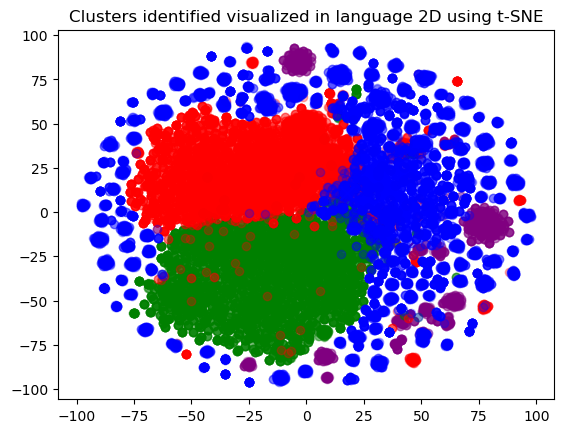

In [1147]:
clustering_cnhu.visualize_clusters()

In [944]:
clustering_cnhu.extract_cluster_themes()

Cluster 0 Theme:  The common narrative that these tweets are trying to push is that Xinjiang's counter-terrorism measures protect human rights.
@ErkinSidick @Dolkun_Isa @Erkin_Azat @adrianzenz #Xinjiang’s counter-terrorism measures protect human rights https://t.co/pzp6NisIsC:   #Xinjiang’   Xinjiang’s counter-terrorism measures protect human rights
#xinjiang
https://t.co/pT7wlk4YnN @F+sgxJIhVt0jDlAMz+ST4l0LEnwKOxP0Txyyx5flKE= https://t.co/v3pIP55RY5:   #Xinjiang’   Xinjiang’s counter-terrorism measures protect human rights
#xinjiang
https://t.co/MwW7wGPE1g @Martin67601 https://t.co/nnCHeU2yJu:   @ErkinSidick @Dolkun_Isa @Erkin_Azat @adrianzenz #Xinjiang’s counter-terrorism measures protect human rights https://t.co/Zssrehd2zy:   Xinjiang’s counter-terrorism measures protect human rights
#xinjiang
https://t.co/HQjWl6hONn @VrjX6Av8BaGagnSDded6SlJQ1ViEECo8ULFAtpQ2GY= https://t.co/hZxUSWfZPM:   -----------------------------------------------------------------------------------------------

In [945]:
CNHU_tweets.to_csv('CNHU_embeddings.csv',index=False)

In [1308]:
cnhu_sample = CNHU.sample(1000)

In [1309]:
cnhu_sample = cnhu_sample[['tweet_text']].reset_index().drop('index',axis=1)

In [1311]:
cnhu_sample

,tweet_text
0,Short videos depict peaceful and happy lives i...
1,##Xinjiang #Urumqis battle against COVID-19 ep...
2,Xinjiang Muslim clerics condemn Western viciou...
3,@BBCBreaking Xinjiang training center graduate...
4,##Xinjiang https://t.co/hLbqjILVsm... https://...
...,...
995,曲線美
996,@[object Object] @[object Object] @[object Obj...
997,##XinjiangOnline # @shahitbiz https://t.co/ULp...
998,"#China announces sanctions on U.S., Canadian i..."


# Chinese Diplomats (https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/2ET9PU&version=1.0)

In [1312]:
dip_cn_path = 'diplos/cn/'

# Get a list of all JSONL files in the directory
jsonl_files = [file for file in os.listdir(dip_cn_path) if file.endswith('.jsonl')]

In [1313]:
jsonl_files

['ChinaEmbFinland.jsonl',
 'chinascio.jsonl',
 'ChinaEmbArg.jsonl',
 'ChinaEmbajada.jsonl',
 'ChineseEmbtoYEM.jsonl',
 'ChinaEmbTurkey.jsonl',
 'AmbChineCmr.jsonl',
 'ChineseEmbinUK.jsonl',
 'ConsulateSan.jsonl',
 'AmbChenWeiQing.jsonl',
 'ChinaEmbSVK.jsonl',
 'ChinaSpox_India.jsonl',
 'CHNembinSudan.jsonl',
 'Dr_ZhaoQinghua.jsonl',
 'ChinaEmbassy_MV.jsonl',
 'Zhang_Xi77.jsonl',
 'ChinaEmbPeru.jsonl',
 'AmbCHINEenRDC.jsonl',
 'LiuYanCHN.jsonl',
 'YXiusheng.jsonl',
 'ChenMingjian_CN.jsonl',
 'yiwen_zh.jsonl',
 'AmbTangSonggen.jsonl',
 'chineambassade.jsonl',
 'AmbFangQiu.jsonl',
 'yang_zhiyu1979.jsonl',
 'chinaembaustria.jsonl',
 'china_embajada.jsonl',
 'Chinamission2un.jsonl',
 'AmbNong.jsonl',
 'chinaembcongobz.jsonl',
 'AmbChineBurundi.jsonl',
 'PRCAmbNepal.jsonl',
 'China_Emb_Mdv.jsonl',
 'Ambzhengzeguang.jsonl',
 'ChineseEstonia.jsonl',
 'LiyingZHU1.jsonl',
 'DrZhaoyongchen.jsonl',
 'prcembassyprg.jsonl',
 'ChinaIraq.jsonl',
 'ChnConsul_osaka.jsonl',
 'JennyinPak.jsonl',
 'ChinaCG

In [1314]:
# Initialize an empty DataFrame to store the concatenated data
dip_cn = pd.DataFrame()

# Loop through each JSONL file and concatenate to the combined DataFrame
for jsonl_file in jsonl_files:
    file_path = os.path.join(dip_cn_path, jsonl_file)
    with open(file_path, 'r', encoding='utf-8') as file:
        # Assuming each line in the JSONL file is a valid JSON object
        data = [json.loads(line) for line in file]
    df = pd.DataFrame(data)
    dip_cn = pd.concat([dip_cn, df], ignore_index=True)

In [1315]:
dip_cn

,edit_history_tweet_ids,referenced_tweets,entities,edit_controls,reply_settings,conversation_id,created_at,public_metrics,lang,id,author_id,possibly_sensitive,context_annotations,text,attachments,in_reply_to_user_id,geo,withheld
0,[1509124212031688704],"[{'type': 'retweeted', 'id': '1508781058778537...","{'mentions': [{'start': 3, 'end': 17, 'usernam...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1509124212031688704,2022-03-30T11:03:44.000Z,"{'retweet_count': 85, 'reply_count': 0, 'like_...",en,1509124212031688704,1209162583346962435,False,"[{'domain': {'id': '10', 'name': 'Person', 'de...",RT @WangLutongMFA: State Councilor and Foreign...,NaN,NaN,NaN,NaN
1,[1509124052765528068],"[{'type': 'quoted', 'id': '1508708806661840897'}]","{'mentions': [{'start': 9, 'end': 23, 'usernam...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1509124052765528068,2022-03-30T11:03:07.000Z,"{'retweet_count': 0, 'reply_count': 5, 'like_c...",en,1509124052765528068,1209162583346962435,False,"[{'domain': {'id': '30', 'name': 'Entities [En...",Welcome! @WangLutongMFA https://t.co/mC7zNTO6oi,NaN,NaN,NaN,NaN
2,[1503295379999272965],NaN,"{'urls': [{'start': 191, 'end': 214, 'url': 'h...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1503295379999272965,2022-03-14T09:02:03.000Z,"{'retweet_count': 1, 'reply_count': 9, 'like_c...",en,1503295379999272965,1209162583346962435,False,NaN,Premier Li Keqiang met with Chinese and foreig...,{'media_keys': ['3_1503295375448358922']},NaN,NaN,NaN
3,[1501198069156790281],NaN,"{'urls': [{'start': 210, 'end': 233, 'url': 'h...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1501198069156790281,2022-03-08T14:08:05.000Z,"{'retweet_count': 1, 'reply_count': 7, 'like_c...",en,1501198069156790281,1209162583346962435,False,"[{'domain': {'id': '131', 'name': 'Unified Twi...",State Councilor and Foreign Minister Wang Yi a...,{'media_keys': ['3_1501198064853336067']},NaN,NaN,NaN
4,[1495348213792051204],"[{'type': 'quoted', 'id': '1495291041561255938'}]","{'hashtags': [{'start': 36, 'end': 45, 'tag': ...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1495348213792051204,2022-02-20T10:42:51.000Z,"{'retweet_count': 1, 'reply_count': 15, 'like_...",en,1495348213792051204,1209162583346962435,False,"[{'domain': {'id': '6', 'name': 'Sports Event'...",Congratulations! A happy ending for #Leijonat!...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116242,[1479366431720583171],NaN,"{'hashtags': [{'start': 48, 'end': 60, 'tag': ...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1479366431720583171,2022-01-07T08:16:57.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en,1479366431720583171,1245613547519787009,False,"[{'domain': {'id': '6', 'name': 'Sports Event'...",WHO official spoke highly of the preparation o...,{'media_keys': ['13_1479187692520882177']},NaN,NaN,NaN
116243,[1478734780867002369],NaN,"{'hashtags': [{'start': 196, 'end': 208, 'tag'...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1478734780867002369,2022-01-05T14:26:59.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en,1478734780867002369,1245613547519787009,False,"[{'domain': {'id': '6', 'name': 'Sports Event'...","As Beijing's only newly built Olympic arena, t...",{'media_keys': ['13_1458302312305541120']},NaN,NaN,NaN
116244,[1478406764630528001],NaN,"{'annotations': [{'start': 3, 'end': 18, 'prob...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1478406764630528001,2022-01-04T16:43:34.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en,1478406764630528001,1245613547519787009,False,"[{'domain': {'id': '131', 'name': 'Unified Twi...","In Wuliang Mountain, Yunnan Province in SW Chi...","{'media_keys': ['3_1478406666240630789', '3_14...",NaN,NaN,NaN
116245,[1478360564288180230],NaN,"{'annotations': [{'start': 35, 'end': 40, 'pro...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",eve

In [1316]:
dip_cn = preprocess_dataframe(dip_cn,'text')

In [1317]:
dip_cn

,edit_history_tweet_ids,referenced_tweets,entities,edit_controls,reply_settings,conversation_id,created_at,public_metrics,lang,id,author_id,possibly_sensitive,context_annotations,text,attachments,in_reply_to_user_id,geo,withheld
0,[1509124212031688704],"[{'type': 'retweeted', 'id': '1508781058778537...","{'mentions': [{'start': 3, 'end': 17, 'usernam...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1509124212031688704,2022-03-30T11:03:44.000Z,"{'retweet_count': 85, 'reply_count': 0, 'like_...",en,1509124212031688704,1209162583346962435,False,"[{'domain': {'id': '10', 'name': 'Person', 'de...",RT @WangLutongMFA: State Councilor and Foreign...,NaN,NaN,NaN,NaN
1,[1509124052765528068],"[{'type': 'quoted', 'id': '1508708806661840897'}]","{'mentions': [{'start': 9, 'end': 23, 'usernam...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1509124052765528068,2022-03-30T11:03:07.000Z,"{'retweet_count': 0, 'reply_count': 5, 'like_c...",en,1509124052765528068,1209162583346962435,False,"[{'domain': {'id': '30', 'name': 'Entities [En...",Welcome! @WangLutongMFA https://t.co/mC7zNTO6oi,NaN,NaN,NaN,NaN
2,[1503295379999272965],NaN,"{'urls': [{'start': 191, 'end': 214, 'url': 'h...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1503295379999272965,2022-03-14T09:02:03.000Z,"{'retweet_count': 1, 'reply_count': 9, 'like_c...",en,1503295379999272965,1209162583346962435,False,NaN,Premier Li Keqiang met with Chinese and foreig...,{'media_keys': ['3_1503295375448358922']},NaN,NaN,NaN
3,[1501198069156790281],NaN,"{'urls': [{'start': 210, 'end': 233, 'url': 'h...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1501198069156790281,2022-03-08T14:08:05.000Z,"{'retweet_count': 1, 'reply_count': 7, 'like_c...",en,1501198069156790281,1209162583346962435,False,"[{'domain': {'id': '131', 'name': 'Unified Twi...",State Councilor and Foreign Minister Wang Yi a...,{'media_keys': ['3_1501198064853336067']},NaN,NaN,NaN
4,[1495348213792051204],"[{'type': 'quoted', 'id': '1495291041561255938'}]","{'hashtags': [{'start': 36, 'end': 45, 'tag': ...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1495348213792051204,2022-02-20T10:42:51.000Z,"{'retweet_count': 1, 'reply_count': 15, 'like_...",en,1495348213792051204,1209162583346962435,False,"[{'domain': {'id': '6', 'name': 'Sports Event'...",Congratulations! A happy ending for #Leijonat!...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116242,[1479366431720583171],NaN,"{'hashtags': [{'start': 48, 'end': 60, 'tag': ...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1479366431720583171,2022-01-07T08:16:57.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en,1479366431720583171,1245613547519787009,False,"[{'domain': {'id': '6', 'name': 'Sports Event'...",WHO official spoke highly of the preparation o...,{'media_keys': ['13_1479187692520882177']},NaN,NaN,NaN
116243,[1478734780867002369],NaN,"{'hashtags': [{'start': 196, 'end': 208, 'tag'...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1478734780867002369,2022-01-05T14:26:59.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en,1478734780867002369,1245613547519787009,False,"[{'domain': {'id': '6', 'name': 'Sports Event'...","As Beijings only newly built Olympic arena, th...",{'media_keys': ['13_1458302312305541120']},NaN,NaN,NaN
116244,[1478406764630528001],NaN,"{'annotations': [{'start': 3, 'end': 18, 'prob...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1478406764630528001,2022-01-04T16:43:34.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en,1478406764630528001,1245613547519787009,False,"[{'domain': {'id': '131', 'name': 'Unified Twi...","In Wuliang Mountain, Yunnan Province in SW Chi...","{'media_keys': ['3_1478406666240630789', '3_14...",NaN,NaN,NaN
116245,[1478360564288180230],NaN,"{'annotations': [{'start': 35, 'end': 40, 'pro...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",eve

In [1318]:
dip_cn_sample = dip_cn.sample(500)

In [1319]:
dip_cn_sample

,edit_history_tweet_ids,referenced_tweets,entities,edit_controls,reply_settings,conversation_id,created_at,public_metrics,lang,id,author_id,possibly_sensitive,context_annotations,text,attachments,in_reply_to_user_id,geo,withheld
42821,[1500872843508256768],"[{'type': 'retweeted', 'id': '1500776954454331...","{'mentions': [{'start': 3, 'end': 19, 'usernam...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1500872843508256768,2022-03-07T16:35:45.000Z,"{'retweet_count': 3, 'reply_count': 0, 'like_c...",de,1500872843508256768,1169509456700465153,False,"[{'domain': {'id': '6', 'name': 'Sports Event'...",RT @chinaembaustria: 🥂❄️🏂 Bis zum 3⃣. Tag der ...,NaN,NaN,NaN,NaN
56993,[1494639199576027138],"[{'type': 'retweeted', 'id': '1494624354704842...","{'annotations': [{'start': 27, 'end': 31, 'pro...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1494639199576027138,2022-02-18T11:45:28.000Z,"{'retweet_count': 6, 'reply_count': 0, 'like_c...",en,1494639199576027138,995265275481284608,False,NaN,RT @wuqueTW: How else does China need to expre...,NaN,NaN,NaN,NaN
16726,[1484181550988025860],"[{'type': 'replied_to', 'id': '148418154803523...","{'annotations': [{'start': 7, 'end': 11, 'prob...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1484181548035231746,2022-01-20T15:10:31.000Z,"{'retweet_count': 1, 'reply_count': 1, 'like_c...",en,1484181550988025860,1899984391,False,NaN,Noting China-Germany ties have been resilient ...,NaN,1899984391,NaN,NaN
69044,[1496449632725090305],"[{'type': 'retweeted', 'id': '1496150440542625...","{'hashtags': [{'start': 26, 'end': 33, 'tag': ...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1496449632725090305,2022-02-23T11:39:29.000Z,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",ar,1496449632725090305,1245664329912942592,False,NaN,RT @aljarida: سفير الصين: #الكويت لديها آفاق و...,NaN,NaN,NaN,NaN
49862,[1509081164677623811],"[{'type': 'retweeted', 'id': '1509038138219450...","{'hashtags': [{'start': 65, 'end': 71, 'tag': ...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1509081164677623811,2022-03-30T08:12:41.000Z,"{'retweet_count': 57, 'reply_count': 0, 'like_...",tl,1509081164677623811,995265275481284608,False,NaN,RT @zhang_heqing: A week ago and later. \nChin...,"{'media_keys': ['3_1509038116505624579', '3_15...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99626,[1486639314511568898],NaN,"{'hashtags': [{'start': 38, 'end': 53, 'tag': ...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1486639314511568898,2022-01-27T09:56:47.000Z,"{'retweet_count': 4, 'reply_count': 2, 'like_c...",it,1486639314511568898,994453158301786113,False,NaN,Latmosfera festosa dellarrivo dello #SpringFes...,"{'media_keys': ['3_1486639093975068672', '3_14...",NaN,NaN,NaN
13212,[1488826467735777283],NaN,"{'hashtags': [{'start': 221, 'end': 240, 'tag'...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1488826467735777283,2022-02-02T10:47:45.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",ru,1488826467735777283,1427842216676974592,True,"[{'domain': {'id': '29', 'name': 'Events [Enti...",Праздник Весны - это самый торжественный и гра...,"{'media_keys': ['3_1488826452493615104', '3_14...",NaN,{'place_id': 'a76c0cd7d56c4836'},NaN
96018,[1488186257263902725],"[{'type': 'retweeted', 'id': '1488148467608395...","{'mentions': [{'start': 3, 'end': 12, 'usernam...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1488186257263902725,2022-01-31T16:23:47.000Z,"{'retweet_count': 3, 'reply_count': 0, 'like_c...",zh,1488186257263902725,1425376680051314693,False,NaN,RT @cnsunchi: 祝福中国驻外所有外交官老师及海外华人朋友们虎年行大运，四季永平安...,NaN,NaN,NaN,NaN
89523,[1507670878103883777],"[{'type': 'retweeted', 'id': '1507668738799435...","{'annotations': [{'start': 37, 'end': 38, 'pro...","{'edits_remaining': 5, 'is_edit_eligible': Tru...",everyone,1507670878103883777,2022-03-26T10:48:43.000Z,"{'retweet_count':

In [1320]:
dip_cn_sample = dip_cn_sample[['text']]

In [1321]:
dip_cn_sample = dip_cn_sample.reset_index().drop('index',axis=1)

In [1322]:
dip_cn_sample

,text
0,RT @chinaembaustria: 🥂❄️🏂 Bis zum 3⃣. Tag der ...
1,RT @wuqueTW: How else does China need to expre...
2,Noting China-Germany ties have been resilient ...
3,RT @aljarida: سفير الصين: #الكويت لديها آفاق و...
4,RT @zhang_heqing: A week ago and later. \nChin...
...,...
495,Latmosfera festosa dellarrivo dello #SpringFes...
496,Праздник Весны - это самый торжественный и гра...
497,RT @cnsunchi: 祝福中国驻外所有外交官老师及海外华人朋友们虎年行大运，四季永平安...
498,RT @yamavhan: 『新疆は良いところ・ 新疆文化観光ウイークin日本』についてのご...


In [1323]:
random_sample = random.sample(1000).reset_index().drop('index',axis=1)

In [1324]:
random_sample.rename(columns={'tweet': 'text'}, inplace=True)

In [1325]:
random_sample

,text
0,where did my sexy fox go
1,zomg. Sooo tired. had lots of fun tho! @phre...
2,@SaschaV yes but unforunately @flasher_girl do...
3,@knobsie123 some of us arent so lucky
4,Zoo with everett
...,...
995,I cant believe I have to wait for Friday!
996,I just too my first breathalizer and passed. Y...
997,has grad school orientation friday
998,Just got home. Missing the sweetheart @stylefi...


In [1326]:
rea_sample = rea[['tweet_text']].sample(1000).reset_index().drop('index',axis=1)

In [1327]:
rea_sample

,tweet_text
0,A truck crashed in Robertson pass between Moss...
1,The Police in Mahwelereng outside Mokopane hav...
2,#Montepuez ruby mine collapses in northern #Mo...
3,"Westdene, Johannesburg: crane overturns, no da..."
4,Fraudulent immigration lawyer from CT faces mo...
...,...
995,Many South Africans are calling for the return...
996,Hawks breached rules in Limpopo raid - https:/...
997,Zimbabwe signs $12 million investment deal wit...
998,Badly decomposed body of a 35-year-old woman w...


In [1328]:
io_rea_cnhu = pd.concat([rea_sample, cnhu_sample]).reset_index().drop('index',axis=1)

In [1329]:
io_rea_cnhu

,tweet_text
0,A truck crashed in Robertson pass between Moss...
1,The Police in Mahwelereng outside Mokopane hav...
2,#Montepuez ruby mine collapses in northern #Mo...
3,"Westdene, Johannesburg: crane overturns, no da..."
4,Fraudulent immigration lawyer from CT faces mo...
...,...
1995,曲線美
1996,@[object Object] @[object Object] @[object Obj...
1997,##XinjiangOnline # @shahitbiz https://t.co/ULp...
1998,"#China announces sanctions on U.S., Canadian i..."


In [1330]:
io_rea_cnhu = io_rea_cnhu.rename(columns={'tweet_text': 'prompt'})

In [1331]:
io_rea_cnhu['completion'] = ' belongs to a state-backed information operation'

In [1332]:
io_rea_cnhu

,prompt,completion
0,A truck crashed in Robertson pass between Moss...,belongs to a state-backed information operation
1,The Police in Mahwelereng outside Mokopane hav...,belongs to a state-backed information operation
2,#Montepuez ruby mine collapses in northern #Mo...,belongs to a state-backed information operation
3,"Westdene, Johannesburg: crane overturns, no da...",belongs to a state-backed information operation
4,Fraudulent immigration lawyer from CT faces mo...,belongs to a state-backed information operation
...,...,...
1995,曲線美,belongs to a state-backed information operation
1996,@[object Object] @[object Object] @[object Obj...,belongs to a state-backed information operation
1997,##XinjiangOnline # @shahitbiz https://t.co/ULp...,belongs to a state-backed information operation
1998,"#China announces sanctions on U.S., Canadian i...",belongs to a state-backed information operation


In [1333]:
io_rea_cnhu['prompt'] = io_rea_cnhu['prompt'].apply(lambda x: str(x) + '\n\n###\n\n')

In [1334]:
io_rea_cnhu = io_rea_cnhu.sample(frac=1).reset_index(drop=True)

In [1335]:
io_rea_cnhu

,prompt,completion
0,"蝶舞轻盈,鱼书雁信 https://t.co/BlMcWMijWm\n\n###\n\n",belongs to a state-backed information operation
1,Believe somebody on his bare word. https://t.c...,belongs to a state-backed information operation
2,Ethiopia planted more than 353 million trees i...,belongs to a state-backed information operation
3,驻阿塞拜疆大使郭敏就新疆问题接受阿“观点”新闻网专访 https://t.co/N4TE1o...,belongs to a state-backed information operation
4,Xinjiang’s counter-terrorism measures protect ...,belongs to a state-backed information operation
...,...,...
1995,Police have confirmed that a former football p...,belongs to a state-backed information operation
1996,18-year-old young-star to represent SA in New ...,belongs to a state-backed information operation
1997,这不关你的事儿!!!! https://t.co/mFLLU2Fj6E\n\n###\n\n,belongs to a state-backed information operation
1998,RT @BeijingReview: China vows to hit back if U...,belongs to a state-backed information operation


In [1337]:
dip_ru_sample

,tweet
0,🇷🇺🇸🇾 О предстоящих переговорах С.В.Лаврова и М...
1,RT @kpru: Санкции за фейки о действиях российс...
2,☝️These acts of #censorship deprive the Austra...
3,"«50/50» Training (Budapest, July) Seminar for ..."
4,RT @ZeeNews: भारत में रूस के राजदूत रोमन बाबुश...
...,...
3495,RT @mod_russia: #ГероиZ https://t.co/3sundzdmT3
3496,"RT @sputnikvaccine: Alexander Gintsburg, Gamal..."
3497,RT @EmbSergio: Hoy hablamos con @VillegasPolja...
3498,Covers of Western magazines they are not asham...


In [1338]:
dip_ru_sample = dip_ru_sample[['tweet']].sample(500)

In [1340]:
dip_ru_sample = dip_ru_sample.rename(columns={'tweet': 'text'})

In [1341]:
nonio_rea_cnhu = pd.concat([random_sample,dip_cn_sample,dip_ru_sample])

In [1342]:
nonio_rea_cnhu

,text
0,where did my sexy fox go
1,zomg. Sooo tired. had lots of fun tho! @phre...
2,@SaschaV yes but unforunately @flasher_girl do...
3,@knobsie123 some of us arent so lucky
4,Zoo with everett
...,...
1160,Press-Release by the Ambassador of Russia to Z...
135,"RT @Louis_Allday: A decade ago today, NATO’s a..."
3483,RT @aaronjmate: US and NATO allies arm neo-Naz...
2310,"📸 Тот момент, когда улыбки не скрыть никакими ..."


In [1343]:
nonio_rea_cnhu['completion'] = ' does not belong to a state-backed information operation'

In [1344]:
nonio_rea_cnhu = nonio_rea_cnhu.rename(columns={'text': 'prompt'})

In [1345]:
nonio_rea_cnhu

,prompt,completion
0,where did my sexy fox go,does not belong to a state-backed information...
1,zomg. Sooo tired. had lots of fun tho! @phre...,does not belong to a state-backed information...
2,@SaschaV yes but unforunately @flasher_girl do...,does not belong to a state-backed information...
3,@knobsie123 some of us arent so lucky,does not belong to a state-backed information...
4,Zoo with everett,does not belong to a state-backed information...
...,...,...
1160,Press-Release by the Ambassador of Russia to Z...,does not belong to a state-backed information...
135,"RT @Louis_Allday: A decade ago today, NATO’s a...",does not belong to a state-backed information...
3483,RT @aaronjmate: US and NATO allies arm neo-Naz...,does not belong to a state-backed information...
2310,"📸 Тот момент, когда улыбки не скрыть никакими ...",does not belong to a state-backed information...


In [1346]:
nonio_rea_cnhu = nonio_rea_cnhu.sample(frac=1).reset_index(drop=True)

In [1347]:
nonio_rea_cnhu

,prompt,completion
0,🔴#ПрямойЭфир🎙️ Брифинг Официального представит...,does not belong to a state-backed information...
1,"&quot;black keys never looked so beautiful, an...",does not belong to a state-backed information...
2,@vampirefreak101 good luck for the competition...,does not belong to a state-backed information...
3,3. Layout of big house blocks surrounding F43 ...,does not belong to a state-backed information...
4,that the Chip/Celena/Chris trio (aka SeeWhySo...,does not belong to a state-backed information...
...,...,...
1995,@crazycade well considering u stayed up until ...,does not belong to a state-backed information...
1996,@amberlicity I think we sold mine at a garage ...,does not belong to a state-backed information...
1997,@Vanessa_91 wow! thats cool! you and your fami...,does not belong to a state-backed information...
1998,RT @RusEmbIndia: 🎄 As the #NewYear2022 is gett...,does not belong to a state-backed information...


In [1348]:
nonio_rea_cnhu['prompt'] = nonio_rea_cnhu['prompt'].apply(lambda x: str(x) + '\n\n###\n\n')

In [1349]:
rea_cnhu = pd.concat([nonio_rea_cnhu, io_rea_cnhu]).sample(frac=1).reset_index(drop=True)

In [1350]:
rea_cnhu

,prompt,completion
0,@ksuyin har-de-har har. Thats exactly what I ...,does not belong to a state-backed information...
1,@globaltimesnews Center of Zenz’s claim abt #U...,belongs to a state-backed information operation
2,"💬Д.#Песков: Понятно, что 🇺🇸американцы сейчас п...",does not belong to a state-backed information...
3,A terrible accident on the R37 road has claime...,belongs to a state-backed information operation
4,"En este Festival de las Linternas, les deseo a...",does not belong to a state-backed information...
...,...,...
3995,RT @CGMeifangZhang: @zhang_heqing The spectacu...,does not belong to a state-backed information...
3996,💬 It is difficult to ignore how journalists ar...,does not belong to a state-backed information...
3997,Zondo commission: former Glencore CEO Ephron t...,belongs to a state-backed information operation
3998,Seven accused for drug manufacturing made brie...,belongs to a state-backed information operation


In [1497]:
eda_rea_cnhu = EDA(rea_cnhu)

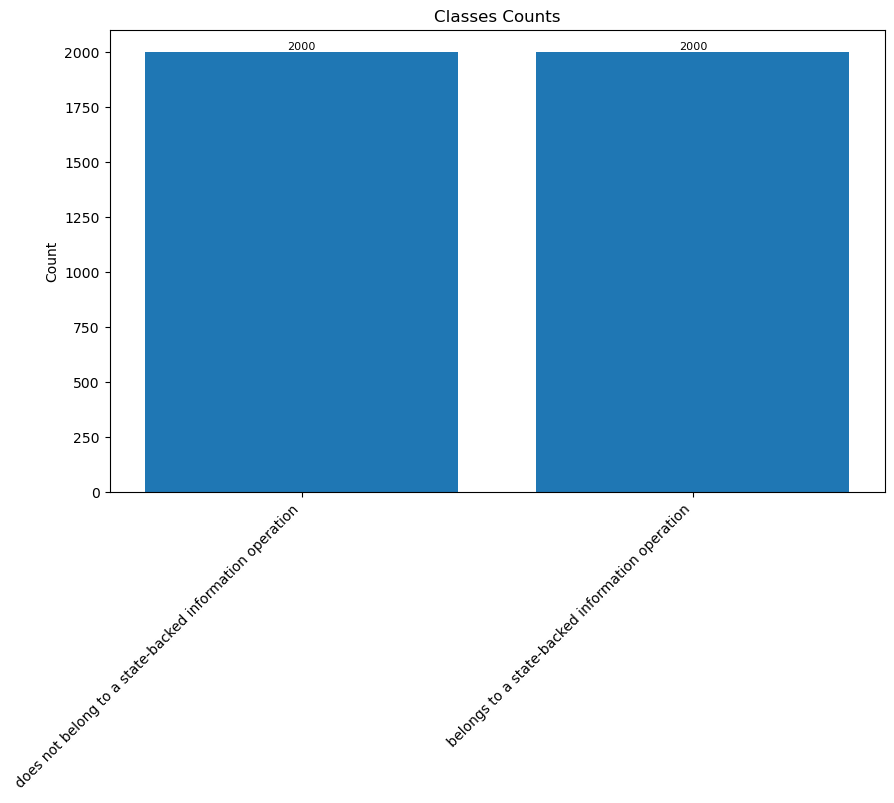

In [1498]:
eda_rea_cnhu.plot_bar_chart(column='completion', title='Classes')

In [1351]:
rea_cnhu.to_json("rea_cnhu.jsonl", orient='records', lines=True)

In [1352]:
!openai tools fine_tunes.prepare_data -f rea_cnhu.jsonl -q

Analyzing...

- Your file contains 4000 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- All prompts end with suffix `\n\n###\n\n`

No remediations found.
- [Recommended] Would you like to split into training and validation set? [Y/n]: Y


Your data will be written to a new JSONL file. Proceed [Y/n]: Y

Wrote modified files to `rea_cnhu_prepared_train.jsonl` and `rea_cnhu_prepared_valid.jsonl`
Feel free to take a look!

Now use that file when fine-tuning:
> openai api fine_tunes.create -t "rea_cnhu_prepared_train.jsonl" -v "rea_cnhu_prepared_valid.jsonl" --compute_classification_metrics --classification_positive_class " does not belong to a state-backed information operation"

After you’ve fine-tun

In [1353]:
!openai api fine_tunes.create -t "rea_cnhu_prepared_train.jsonl" -v "rea_cnhu_prepared_valid.jsonl" --compute_classification_metrics --classification_positive_class " belongs to a state-backed information operation" -m ada

Upload progress: 100%|███████████████████████| 779k/779k [00:00<00:00, 430Mit/s]
Uploaded file from rea_cnhu_prepared_train.jsonl: file-1rF66GplEGvalxI0P4Af7HHc
Upload progress: 100%|███████████████████████| 195k/195k [00:00<00:00, 120Mit/s]
Uploaded file from rea_cnhu_prepared_valid.jsonl: file-Xw7YHjM2DBNsgdKPBN9lyKdq
Created fine-tune: ft-o0ddzYQ26g9rtxOsVshQHUcf
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-12-07 19:00:16] Created fine-tune: ft-o0ddzYQ26g9rtxOsVshQHUcf

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-o0ddzYQ26g9rtxOsVshQHUcf



In [1423]:
!openai api fine_tunes.follow -i ft-o0ddzYQ26g9rtxOsVshQHUcf

[2023-12-07 19:00:16] Created fine-tune: ft-o0ddzYQ26g9rtxOsVshQHUcf
[2023-12-07 19:04:23] Fine-tune costs $0.34
[2023-12-07 19:04:23] Fine-tune enqueued. Queue number: 0
[2023-12-07 19:04:26] Fine-tune started
[2023-12-07 19:09:58] Completed epoch 1/4
[2023-12-07 19:21:01] Completed epoch 3/4
[2023-12-07 19:27:04] Uploaded model: ada:ft-personal-2023-12-08-00-27-03
[2023-12-07 19:27:05] Uploaded result file: file-ZafZNoNbIuwwmPJmMtcJnuWX
[2023-12-07 19:27:05] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m ada:ft-personal-2023-12-08-00-27-03 -p <YOUR_PROMPT>


In [1424]:
!openai api fine_tunes.results -i ft-o0ddzYQ26g9rtxOsVshQHUcf > results_rea_cnhu.csv

In [1425]:
results_rea_cnhu = pd.read_csv('results_rea_cnhu.csv')

In [1426]:
results_rea_cnhu

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
0,1,388,4,0.595995,0.00,0.176471,0.328803,0.0,0.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1256,8,0.269873,0.00,0.184211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1580,12,0.598222,0.00,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2032,16,0.367226,0.00,0.361111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2708,20,0.218556,0.00,0.447368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,3198,1582840,12792,0.013287,1.00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3198,3199,1582972,12796,0.021452,1.00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3199,3200,1583552,12800,0.013270,1.00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3200,3201,1583780,12804,0.018340,0.75,0.973684,0.017161,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


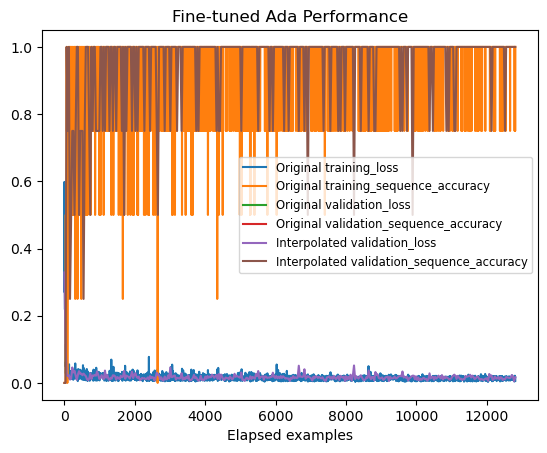

In [1427]:
x_column = 'elapsed_examples'
y_columns = ['training_loss', 'training_sequence_accuracy', 'validation_loss', 'validation_sequence_accuracy']

# Plot the original data
for col in y_columns:
    plt.plot(results_rea_cnhu[x_column], results_rea_cnhu[col], label=f'Original {col}')

# Interpolate and plot on the same graph
for col in ['validation_loss', 'validation_sequence_accuracy']:
    plt.plot(results_rea_cnhu[x_column], results_rea_cnhu[col].interpolate(), label=f'Interpolated {col}')

plt.title('Fine-tuned Ada Performance')
plt.xlabel('Elapsed examples')
plt.legend(fontsize='small') 
plt.show()

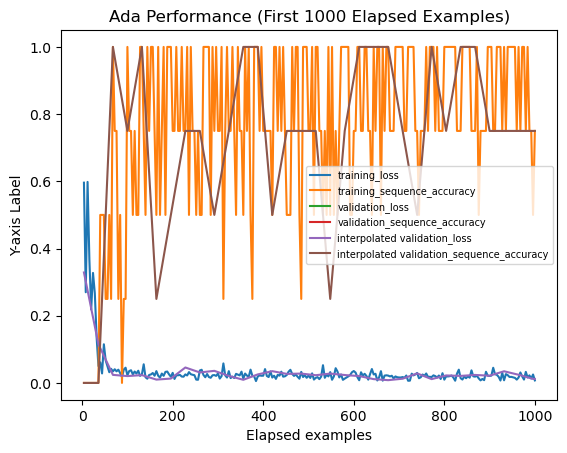

In [1460]:
filtered_results = results_rea_cnhu[results_rea_cnhu[x_column] <= 1000]

# Plot the original data
for col in y_columns:
    plt.plot(filtered_results[x_column], filtered_results[col], label=f'{col}')

# Interpolate and plot on the same graph
for col in ['validation_loss', 'validation_sequence_accuracy']:
    plt.plot(filtered_results[x_column], filtered_results[col].interpolate(), label=f'interpolated {col}')

plt.title('Ada Performance (First 1000 Elapsed Examples)')
plt.xlabel('Elapsed examples')
plt.ylabel('Y-axis Label')
plt.legend(fontsize=7)
plt.show()

# Test on GRU

In [1429]:
result2 = openai_api_completion(gru_test, 'tweet_text', 'ada:ft-personal-2023-12-08-00-27-03')

Error processing row 17746: Command 'openai api completions.create -m ada:ft-personal-2023-12-08-00-27-03 -p "#SyAF airstrikes over #Sidi `Ali  #SAA #SyAF #militants #terrorism #terrorist #Idlib #Hama #Aleppo #Latakia https://t.co/cjyNqNd6pv

###

"' returned non-zero exit status 2.


/bin/sh: -c: line 0: unexpected EOF while looking for matching ``'
/bin/sh: -c: line 5: syntax error: unexpected end of file


In [1437]:
accuracy = (result2['completion'].str.contains('belongs to a state-backed information operation').sum() / len(result2)) * 100

In [1438]:
accuracy

38.4

# Test on RNA

In [1432]:
result_2io_rna = openai_api_completion(rna_test, 'tweet_text', 'ada:ft-personal-2023-12-08-00-27-03')

In [1433]:
accuracy = (result_2io_rna['completion'].str.contains('belongs to a state-backed information operation').sum() / len(result_2io_rna)) * 100

In [1434]:
accuracy

58.4

# Test on RNA and non-IO tweets

In [1435]:
test

,tweet_text,true_label,completion
0,yah not looking forward to that part so much.....,does not belong to a state-backed information...,does not belong to a state-backed information...
1,RT @JayshKarama: حافلتان تحمل عناصر ميليشيا #ع...,belongs to a state-backed information operation,does not belong to a state-backed information...
2,Une mission de conciliation sera envoyée à #Nd...,belongs to a state-backed information operation,does not belong to a state-backed information...
3,President #Putin: #Russia-#China relations of ...,does not belong to a state-backed information...,does not belong to a state-backed information...
4,🇷🇺📢Переговоры с главой МИД #РФ Сергеем #Лавров...,does not belong to a state-backed information...,does not belong to a state-backed information...
...,...,...,...
1975,@honorsociety why cant you go &quot;full moon ...,does not belong to a state-backed information...,does not belong to a state-backed information...
1976,has a full day of work ahead of him,does not belong to a state-backed information...,does not belong to a state-backed information...
1977,#SAA #Idlib,belongs to a state-backed information operation,does not belong to a state-backed information...
1978,@chrisbrogan iffen yer looking for a hit post ...,does not belong to a state-backed information...,does not belong to a state-backed information...


In [1436]:
rea_cnhu

,prompt,completion
0,@ksuyin har-de-har har. Thats exactly what I ...,does not belong to a state-backed information...
1,@globaltimesnews Center of Zenz’s claim abt #U...,belongs to a state-backed information operation
2,"💬Д.#Песков: Понятно, что 🇺🇸американцы сейчас п...",does not belong to a state-backed information...
3,A terrible accident on the R37 road has claime...,belongs to a state-backed information operation
4,"En este Festival de las Linternas, les deseo a...",does not belong to a state-backed information...
...,...,...
3995,RT @CGMeifangZhang: @zhang_heqing The spectacu...,does not belong to a state-backed information...
3996,💬 It is difficult to ignore how journalists ar...,does not belong to a state-backed information...
3997,Zondo commission: former Glencore CEO Ephron t...,belongs to a state-backed information operation
3998,Seven accused for drug manufacturing made brie...,belongs to a state-backed information operation


In [1440]:
test_overlap = pd.merge(test, rea_cnhu, left_on='tweet_text', right_on='prompt', how='inner')

In [1441]:
test_overlap

,tweet_text,true_label,completion_x,prompt,completion_y


In [1442]:
final_results = openai_api_completion(test, 'tweet_text', 'ada:ft-personal-2023-12-08-00-27-03')

/bin/sh: s: command not found


In [1443]:
final_results

,tweet_text,true_label,completion
0,yah not looking forward to that part so much.....,does not belong to a state-backed information...,does not belong to a state-backed information...
1,RT @JayshKarama: حافلتان تحمل عناصر ميليشيا #ع...,belongs to a state-backed information operation,does not belong to a state-backed information...
2,Une mission de conciliation sera envoyée à #Nd...,belongs to a state-backed information operation,belongs to a state-backed information operati...
3,President #Putin: #Russia-#China relations of ...,does not belong to a state-backed information...,does not belong to a state-backed information...
4,🇷🇺📢Переговоры с главой МИД #РФ Сергеем #Лавров...,does not belong to a state-backed information...,does not belong to a state-backed information...
...,...,...,...
1975,@honorsociety why cant you go &quot;full moon ...,does not belong to a state-backed information...,does not belong to a state-backed information...
1976,has a full day of work ahead of him,does not belong to a state-backed information...,does not belong to a state-backed information...
1977,#SAA #Idlib,belongs to a state-backed information operation,belongs to a state-backed information operati...
1978,@chrisbrogan iffen yer looking for a hit post ...,does not belong to a state-backed information...,does not belong to a state-backed information...


In [1444]:
final_results.to_csv('final_results.csv')

In [1445]:
viz_results = final_results.copy()

In [1446]:
viz_results

,tweet_text,true_label,completion
0,yah not looking forward to that part so much.....,does not belong to a state-backed information...,does not belong to a state-backed information...
1,RT @JayshKarama: حافلتان تحمل عناصر ميليشيا #ع...,belongs to a state-backed information operation,does not belong to a state-backed information...
2,Une mission de conciliation sera envoyée à #Nd...,belongs to a state-backed information operation,belongs to a state-backed information operati...
3,President #Putin: #Russia-#China relations of ...,does not belong to a state-backed information...,does not belong to a state-backed information...
4,🇷🇺📢Переговоры с главой МИД #РФ Сергеем #Лавров...,does not belong to a state-backed information...,does not belong to a state-backed information...
...,...,...,...
1975,@honorsociety why cant you go &quot;full moon ...,does not belong to a state-backed information...,does not belong to a state-backed information...
1976,has a full day of work ahead of him,does not belong to a state-backed information...,does not belong to a state-backed information...
1977,#SAA #Idlib,belongs to a state-backed information operation,belongs to a state-backed information operati...
1978,@chrisbrogan iffen yer looking for a hit post ...,does not belong to a state-backed information...,does not belong to a state-backed information...


In [1447]:
viz_results['true_label'][1][:8]==' belongs'

True

In [1448]:
viz_results['true_label'] = np.where(viz_results['true_label'].str[:8] == " belongs", 1, 0)

In [1449]:
viz_results

,tweet_text,true_label,completion
0,yah not looking forward to that part so much.....,0,does not belong to a state-backed information...
1,RT @JayshKarama: حافلتان تحمل عناصر ميليشيا #ع...,1,does not belong to a state-backed information...
2,Une mission de conciliation sera envoyée à #Nd...,1,belongs to a state-backed information operati...
3,President #Putin: #Russia-#China relations of ...,0,does not belong to a state-backed information...
4,🇷🇺📢Переговоры с главой МИД #РФ Сергеем #Лавров...,0,does not belong to a state-backed information...
...,...,...,...
1975,@honorsociety why cant you go &quot;full moon ...,0,does not belong to a state-backed information...
1976,has a full day of work ahead of him,0,does not belong to a state-backed information...
1977,#SAA #Idlib,1,belongs to a state-backed information operati...
1978,@chrisbrogan iffen yer looking for a hit post ...,0,does not belong to a state-backed information...


In [1450]:
viz_results['completion'] = np.where(viz_results['completion'].str[:8] == " belongs", 1, 0)

In [1451]:
viz_results

,tweet_text,true_label,completion
0,yah not looking forward to that part so much.....,0,0
1,RT @JayshKarama: حافلتان تحمل عناصر ميليشيا #ع...,1,0
2,Une mission de conciliation sera envoyée à #Nd...,1,1
3,President #Putin: #Russia-#China relations of ...,0,0
4,🇷🇺📢Переговоры с главой МИД #РФ Сергеем #Лавров...,0,0
...,...,...,...
1975,@honorsociety why cant you go &quot;full moon ...,0,0
1976,has a full day of work ahead of him,0,0
1977,#SAA #Idlib,1,1
1978,@chrisbrogan iffen yer looking for a hit post ...,0,0


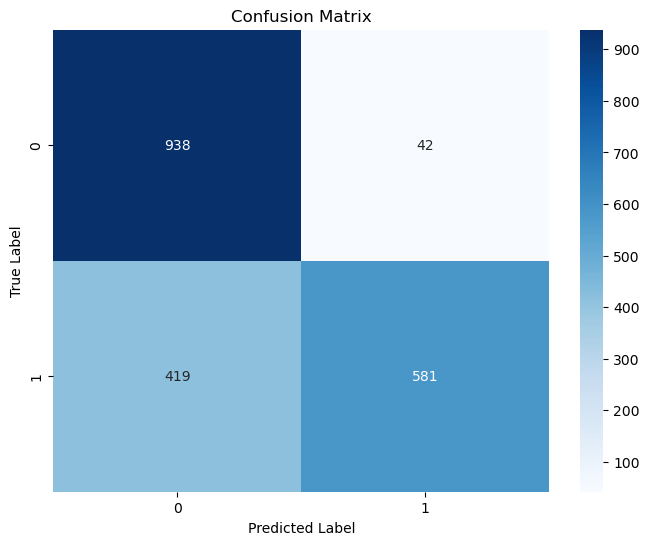

In [1452]:
metrics_dict = calculate_and_visualize_metrics(viz_results)

In [1453]:
metrics_dict['precision']

0.9325842696629213

In [1454]:
metrics_dict['recall']

0.581

In [1455]:
metrics_dict['accuracy']

0.7671717171717172

In [1456]:
metrics_dict['f1_score']

0.7159581022797289